# CLASE 3.4: GRAFICACIÓN EN TRES DIMENSIONES.
---

**Matplotlib** es una librería que de fue diseñada, en un principio, únicamente para la construcción de gráficos bidimensionales. A partir de la versión `1.0` se han ido añadiendo algunas utilidades que han expandido la capacidad de **Matplotlib** para darle soporte a la graficación de data tridimensional. Estas herramientas están disponibles en el submódulo `mplot3d`, que se incluye con la instalación de la librería principal.

Partimos, como siempre, haciendo las correspondientes importaciones:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from mpl_toolkits import mplot3d

In [3]:
# Setting de parámetros de graficación.
plt.style.use("seaborn-white") # Template.
plt.rcParams["figure.dpi"] = 100 # Resolución de nuestras figuras.

/var/folders/sn/hlgjzv2n1537dplx8bvvj1c80000gn/T/ipykernel_2832/3365211025.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white") # Template.


Una vez importado el submódulo `mplot3d`, es posible crear un objeto tipo `Axes` en tres dimensiones añadiendo el argumento `projection="3d"` a cualquier rutina de creación de estos objetos:

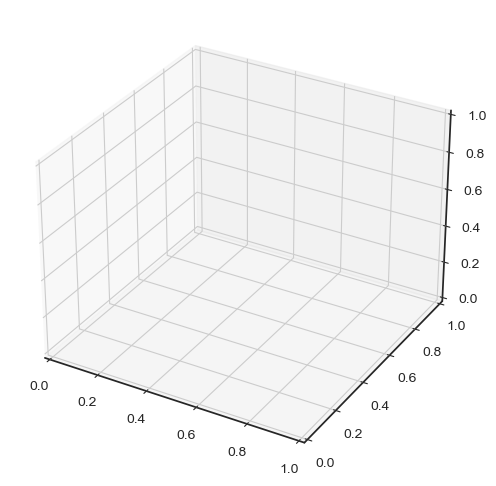

In [4]:
# Una caja apta para graficar data en 3D.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')

Con un objeto de este tipo habilitado, ya podemos construir una generosa variedad de gráficos tridimensionales. Sin embargo, los gráficos de este tipo se ven enormemente beneficiados de la interactividad de nuestro IDE para así poder mover a voluntad las figuras resultantes. De esta manera, si estamos en una sesión de Jupyter, para habilitar los gráficos interactivos, bastará con que precedamos nuestros bloques de código con el código mágico `%matplotlib notebook`.

In [5]:
%matplotlib notebook

## Gráficos de líneas y dispersión.
Los gráficos tridimensionales más sencillos corresponden a los de líneas y dispersión, y se crean a partir de una colección de puntos en un dominio de $\mathbb{R}^{3}$ del tipo $(x, y, z)$. De manera análoga a los gráficos de líneas y de dispersión bidimensionales que creamos en nuestros primeros pasos con **Matplotlib**, los respectivos análogos tridimensionales pueden crearse mediante los métodos `ax.plot3D()` y `ax.scatter3D()`.

Combinemos ambos tipos de gráfico visualizando una curva espacial denominada hélice, y que puede expresarse por medio de la ecuación paramétrica $\mathbf{r}(t)=(r\sin{t}, r\cos{t}, kt)$. Para ello, primero definiremos la curva por medio del parámetro $z(t)=kt$, poniendo en este caso $k=r=1$. De esta manera:

In [6]:
# Creamos la data para el gráfico de líneas.
zt = np.linspace(start=0, stop=20, num=1000)
xt = np.sin(zt)
yt = np.cos(zt)

Para el caso de los puntos, agregaremos un poco de ruido:

In [7]:
# Creamos una semilla aleatoria fija.
rng = np.random.default_rng(42)

In [8]:
# Creamos la data para el gráfico de puntos.
z = zt[-1] * rng.random(size=100)
x = np.sin(z) + 0.5 * rng.random(size=100)
y = np.cos(z) + 0.5 * rng.random(size=100)

Ya estamos en condiciones de construir nuestro gráfico:

<IPython.core.display.Javascript object>


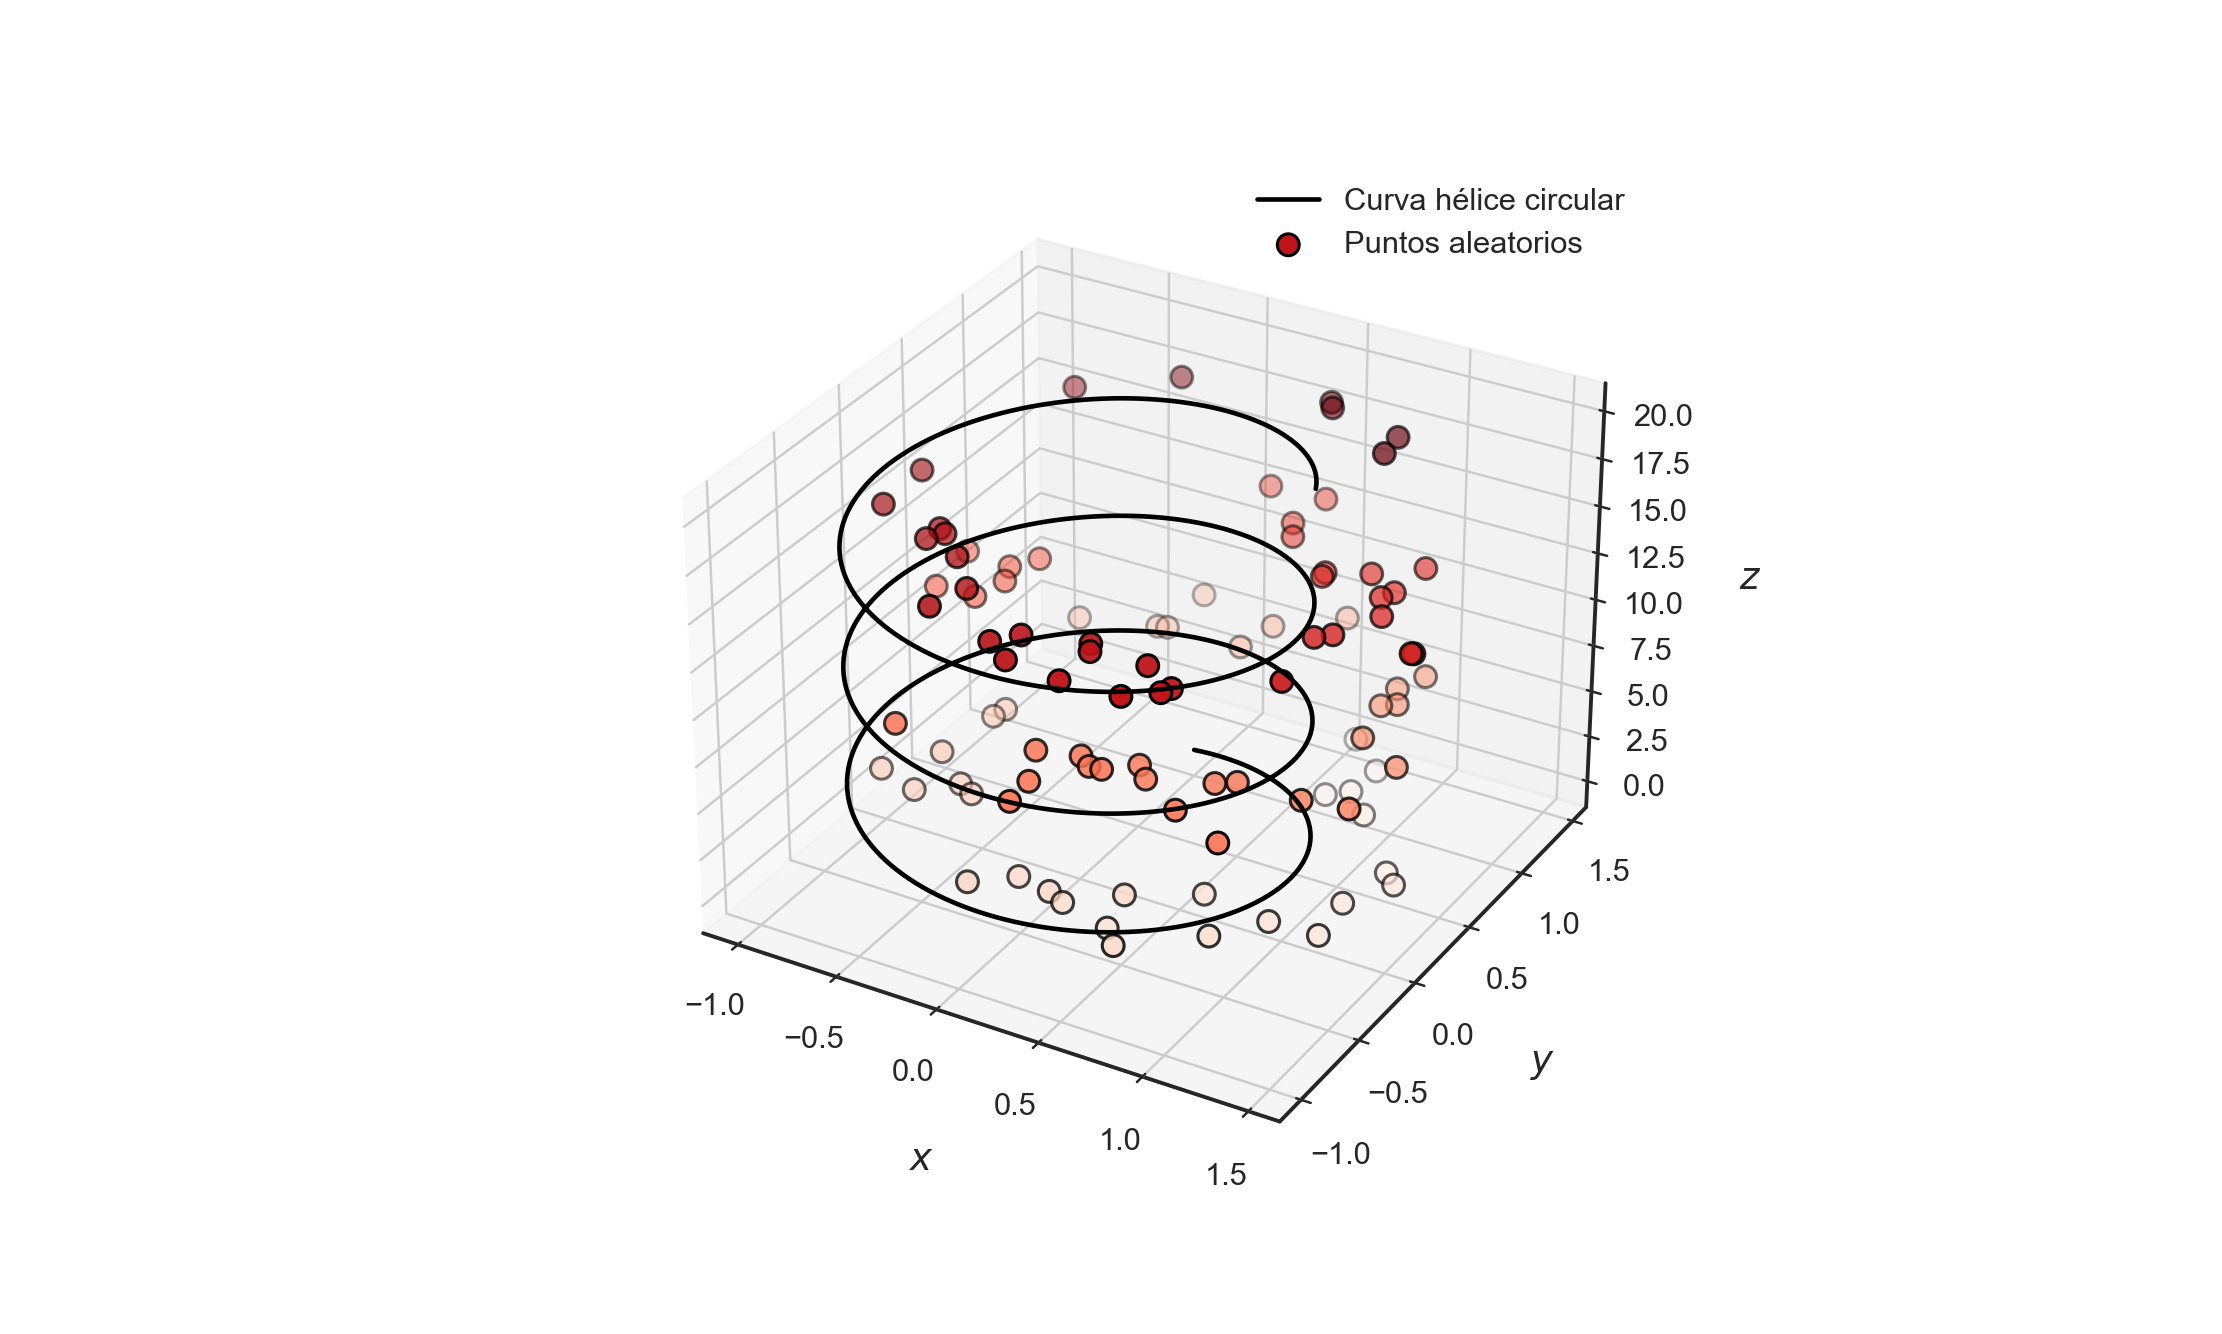

In [9]:
# Creamos nuestro gráfico.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot3D(xt, yt, zt, color="black", label="Curva hélice circular")
ax.scatter3D(x, y, z, c=z, s=50, cmap="Reds", edgecolor="k", label="Puntos aleatorios")
ax.legend(loc="best", fontsize=10)
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10);

Notemos que, por defecto, los puntos del gráfico de dispersión tienen su transparencia ajustada de tal forma que se dé un sentido de profundidad del gráfico al pegarlo en una figura estática. Si bien el efecto tridimensional de un gráfico es difícil de ver mediante una imagen estática, una imagen interactiva nos puede dar una intuición muy interesante relativa a este tipo de visualizaciones.

Observamos que la rotulación de este gráfico es exactamente igual a la de un gráfico 2D. Sólo hemos agregado el método `ax.set_zlabel()` para etiquetar el eje Z.

## Gráficos tridimensionales de contorno.
De manera análoga a los gráficos de contorno vistos previamente, `mplot3d` contiene herramientas para crear gráficos de relieve en espacios tridimensionales utilizando los mismos parámetros de entrada. En este caso, el método análogo es `ax.contour3D()`, y requiere que toda la data de entrada tenga la forma de grillas regulares bidimensionales, con la data relativa al eje Z evaluada en cada punto. En el siguiente ejemplo, mostraremos un diagrama de contorno de una superficie sinusoidal en tres dimensiones cuya ecuación es

$$f\left( x,y\right)  =\mathrm{s} \mathrm{e} \mathrm{n} \left( x^{2}+y^{2}\right)^{\frac{1}{2}}$$
</p> <p style="text-align: right;">$(4.1)$</p>

Definimos pues esta función:

In [10]:
# Función a graficar en un gráfico de contorno.
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

Y ahora preparamos la data mediante una grilla:

In [11]:
# Definimos los bordes de la grilla.
x = np.linspace(start=-10, stop=10, num=40)
y = np.linspace(start=-10, stop=10, num=40)

In [12]:
# Construimos la grilla propiamente tal.
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

<IPython.core.display.Javascript object>


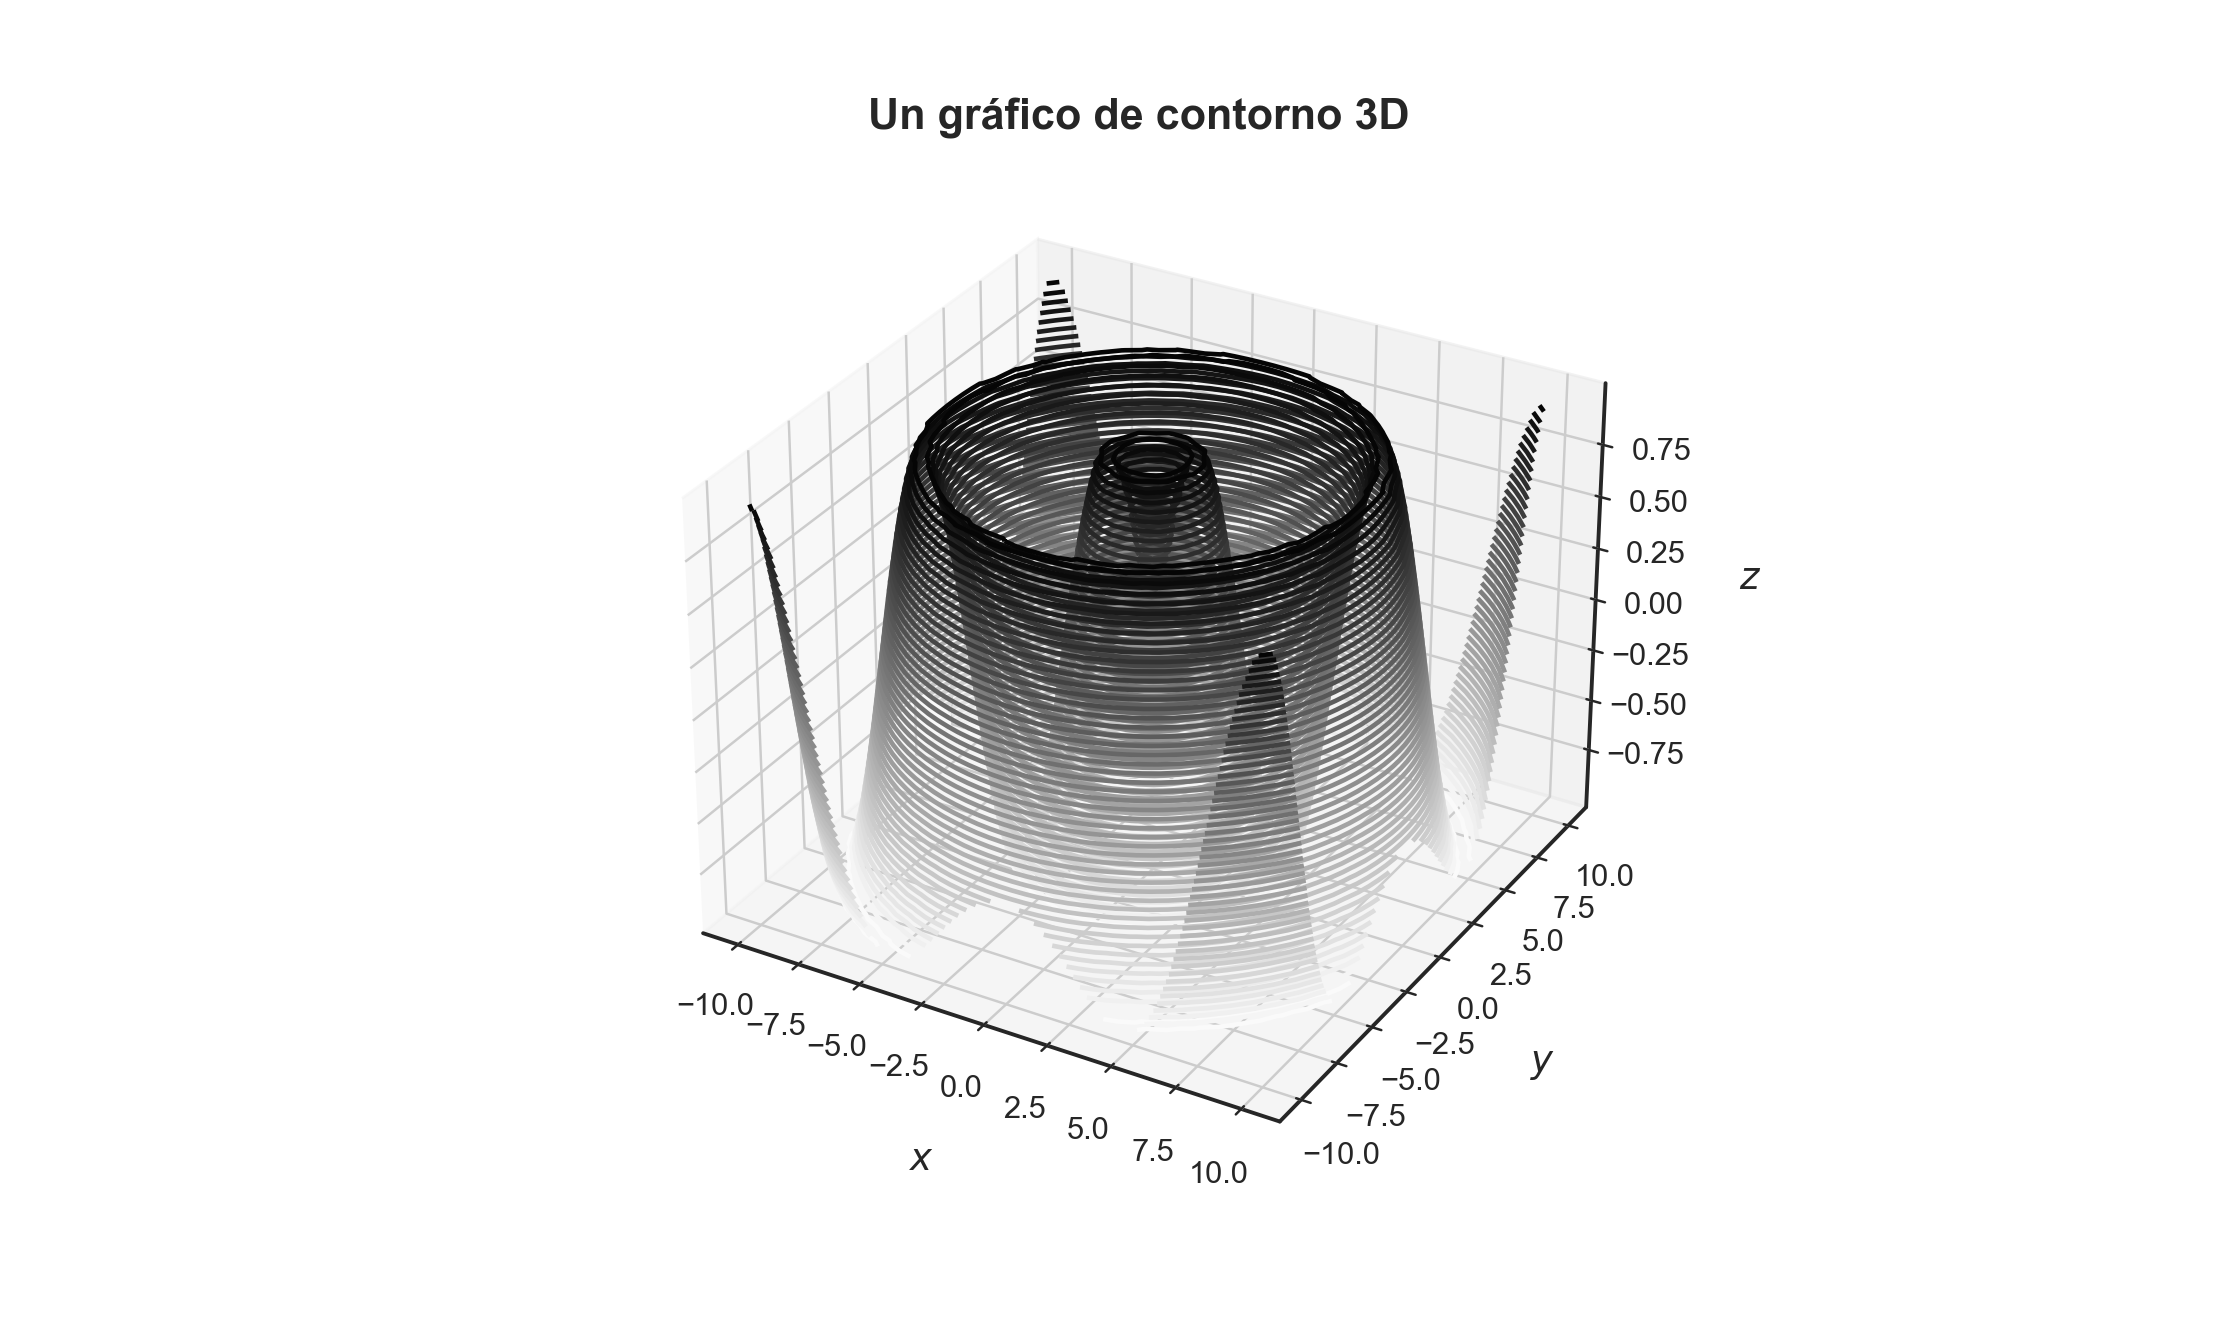

In [13]:
# Y construimos nuestro gráfico.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.set_title("Un gráfico de contorno 3D", fontsize=14, fontweight="bold", pad=10);

A veces el ángulo de visión por defecto del gráfico no resulta ser óptimo, en cuyo caso podemos utilizar el método `ax.view_init()` para setear los ángulos de elevación y azimutal del mismo. En el siguiente ejemplo, utilizaremos un ángulo de elevación de 60º (con respecto al plano $XY$) y un azimut de 35º (con respecto al eje $Z$ positivo):

<IPython.core.display.Javascript object>


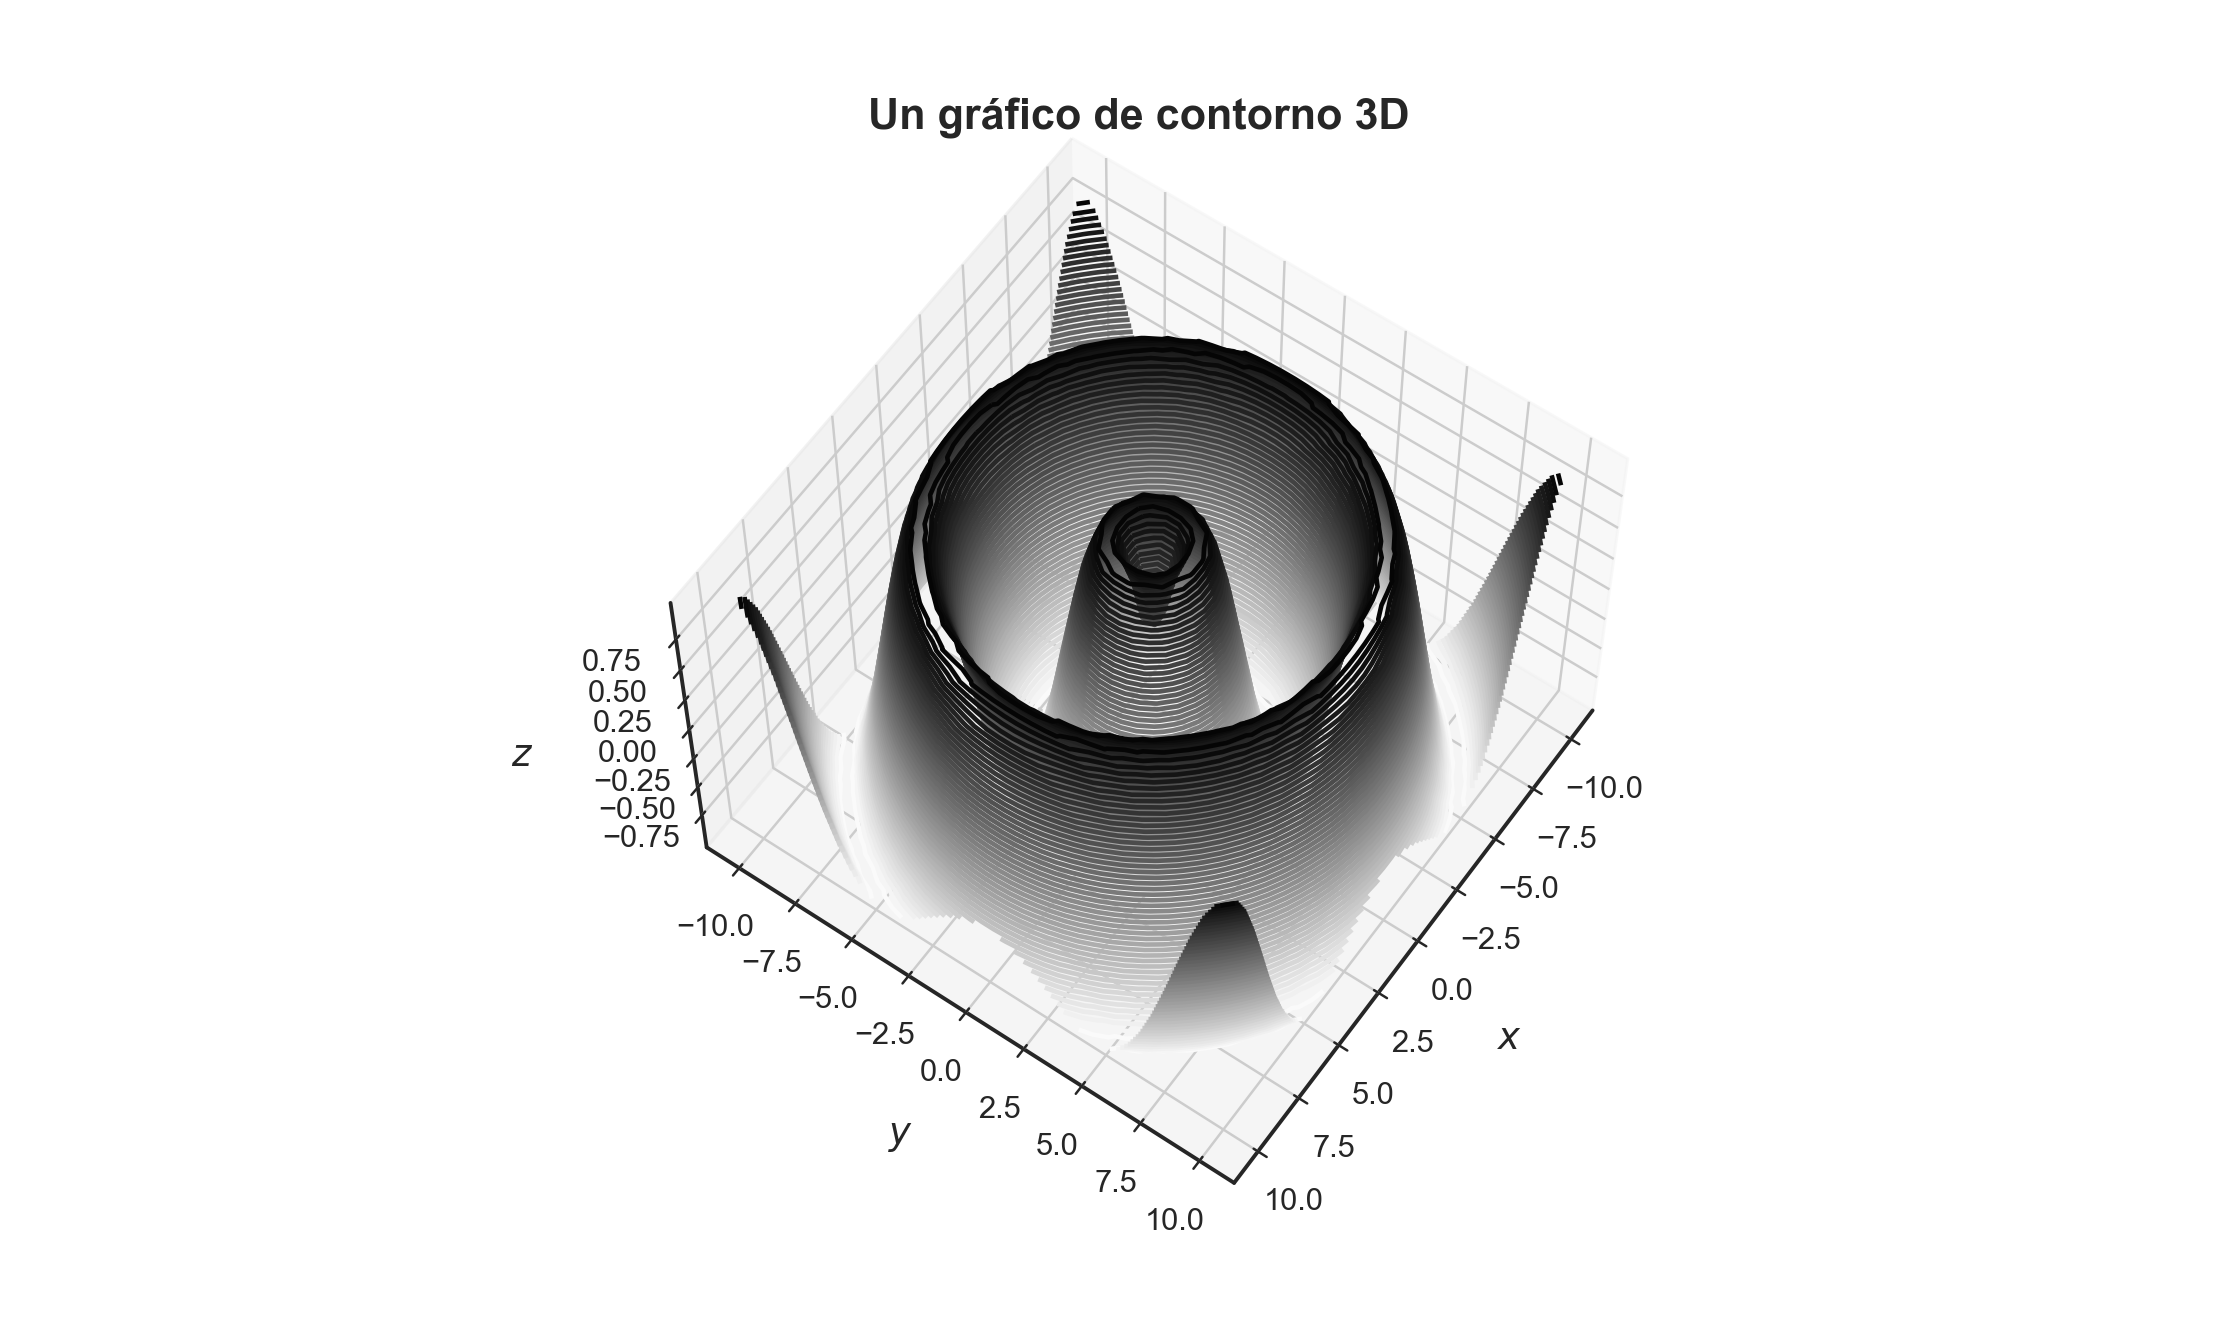

In [14]:
# Cambiamos los ángulos de visualización por defecto.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.set_title("Un gráfico de contorno 3D", fontsize=14, fontweight="bold", pad=10)
ax.view_init(60, 35);

Nuevamente, notemos que este tipo de rotación puede ser lograda de manera más intuitiva con una imagen interactiva.

## Gráficos de enmallado y superficie.
Otros dos tipos de gráficos que trabajan sobre data en formato de grillas corresponden a los enmallados (*wireframes*) y superficies. Son capaces de tomar una grilla de puntos evaluados en distintos valores de $Z$ y proyectarlos en una región de $\mathbb{R}^{3}$.

Los gráficos de enmallado constan de una suerte de alambre o cuerda que se *anuda* para representar en toda su extensión a una superficie, generando triangulaciones sobre una grilla regular; para ello, podemos usar la función `ax.plot_wireframe()`. Un ejemplo de enmallado es el siguiente:

<IPython.core.display.Javascript object>


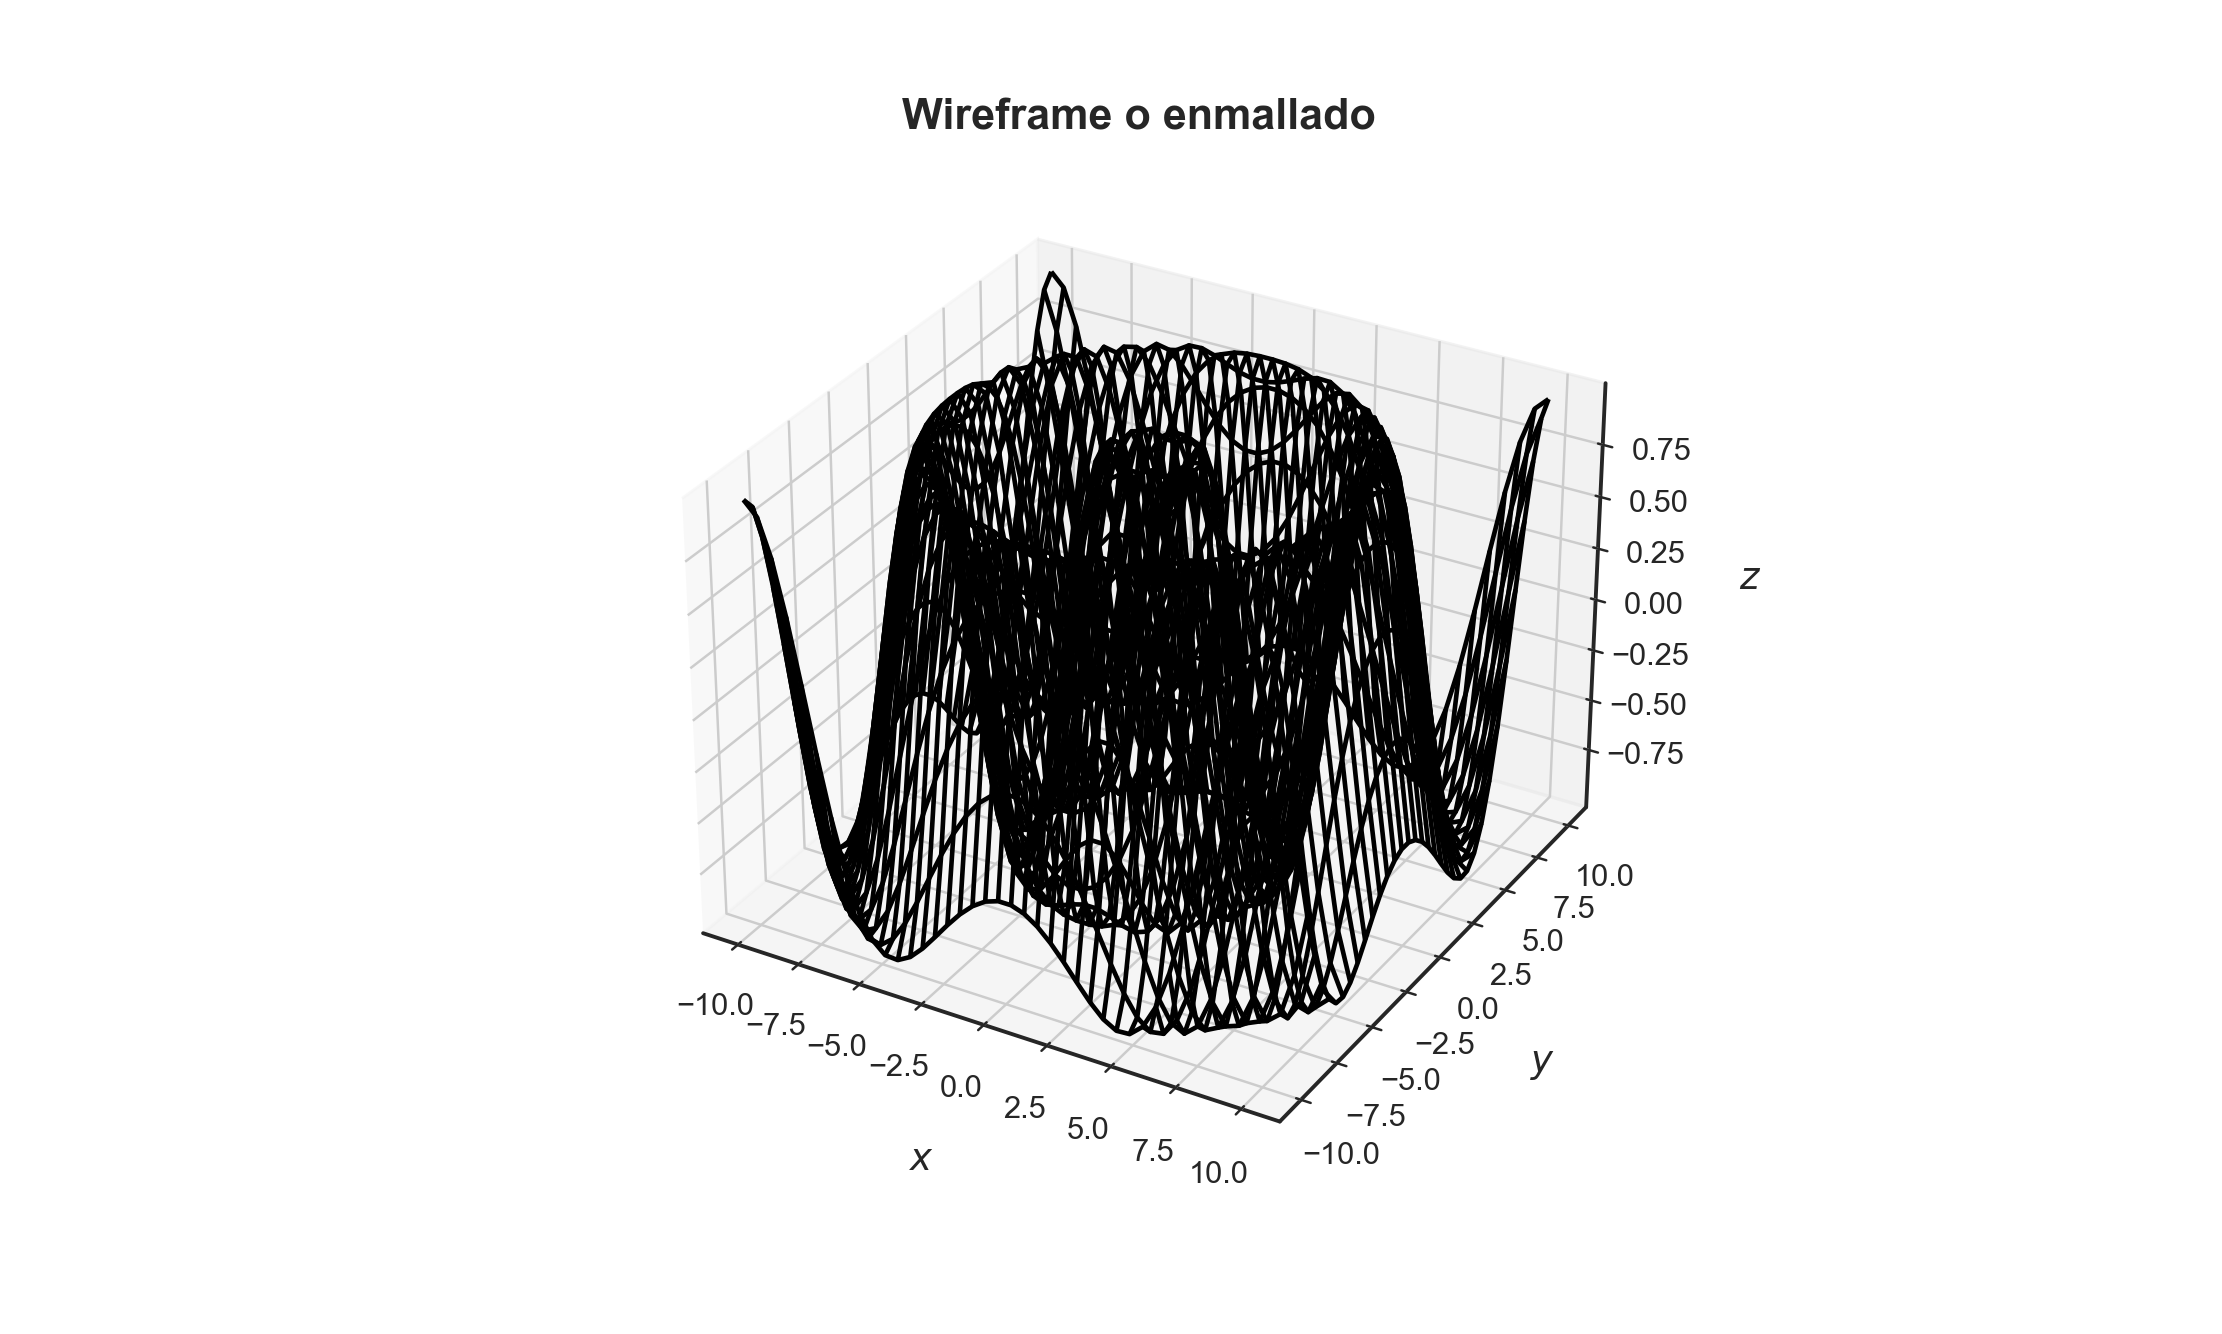

In [15]:
# Un ejemplo de enmallado.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.set_title('Wireframe o enmallado', fontsize=14, fontweight="bold", pad=10);

Una superficie es similar a un enmallado, pero cada polígono resultante de la malla se colorea. La adición de un mapa de color a un enmallado a fin de construir una superficie nos puede dar una muy buena idea intuitiva de la topología de la región que queremos graficar. Para ello, podemos usar la función `ax.plot_surface()`:

<IPython.core.display.Javascript object>


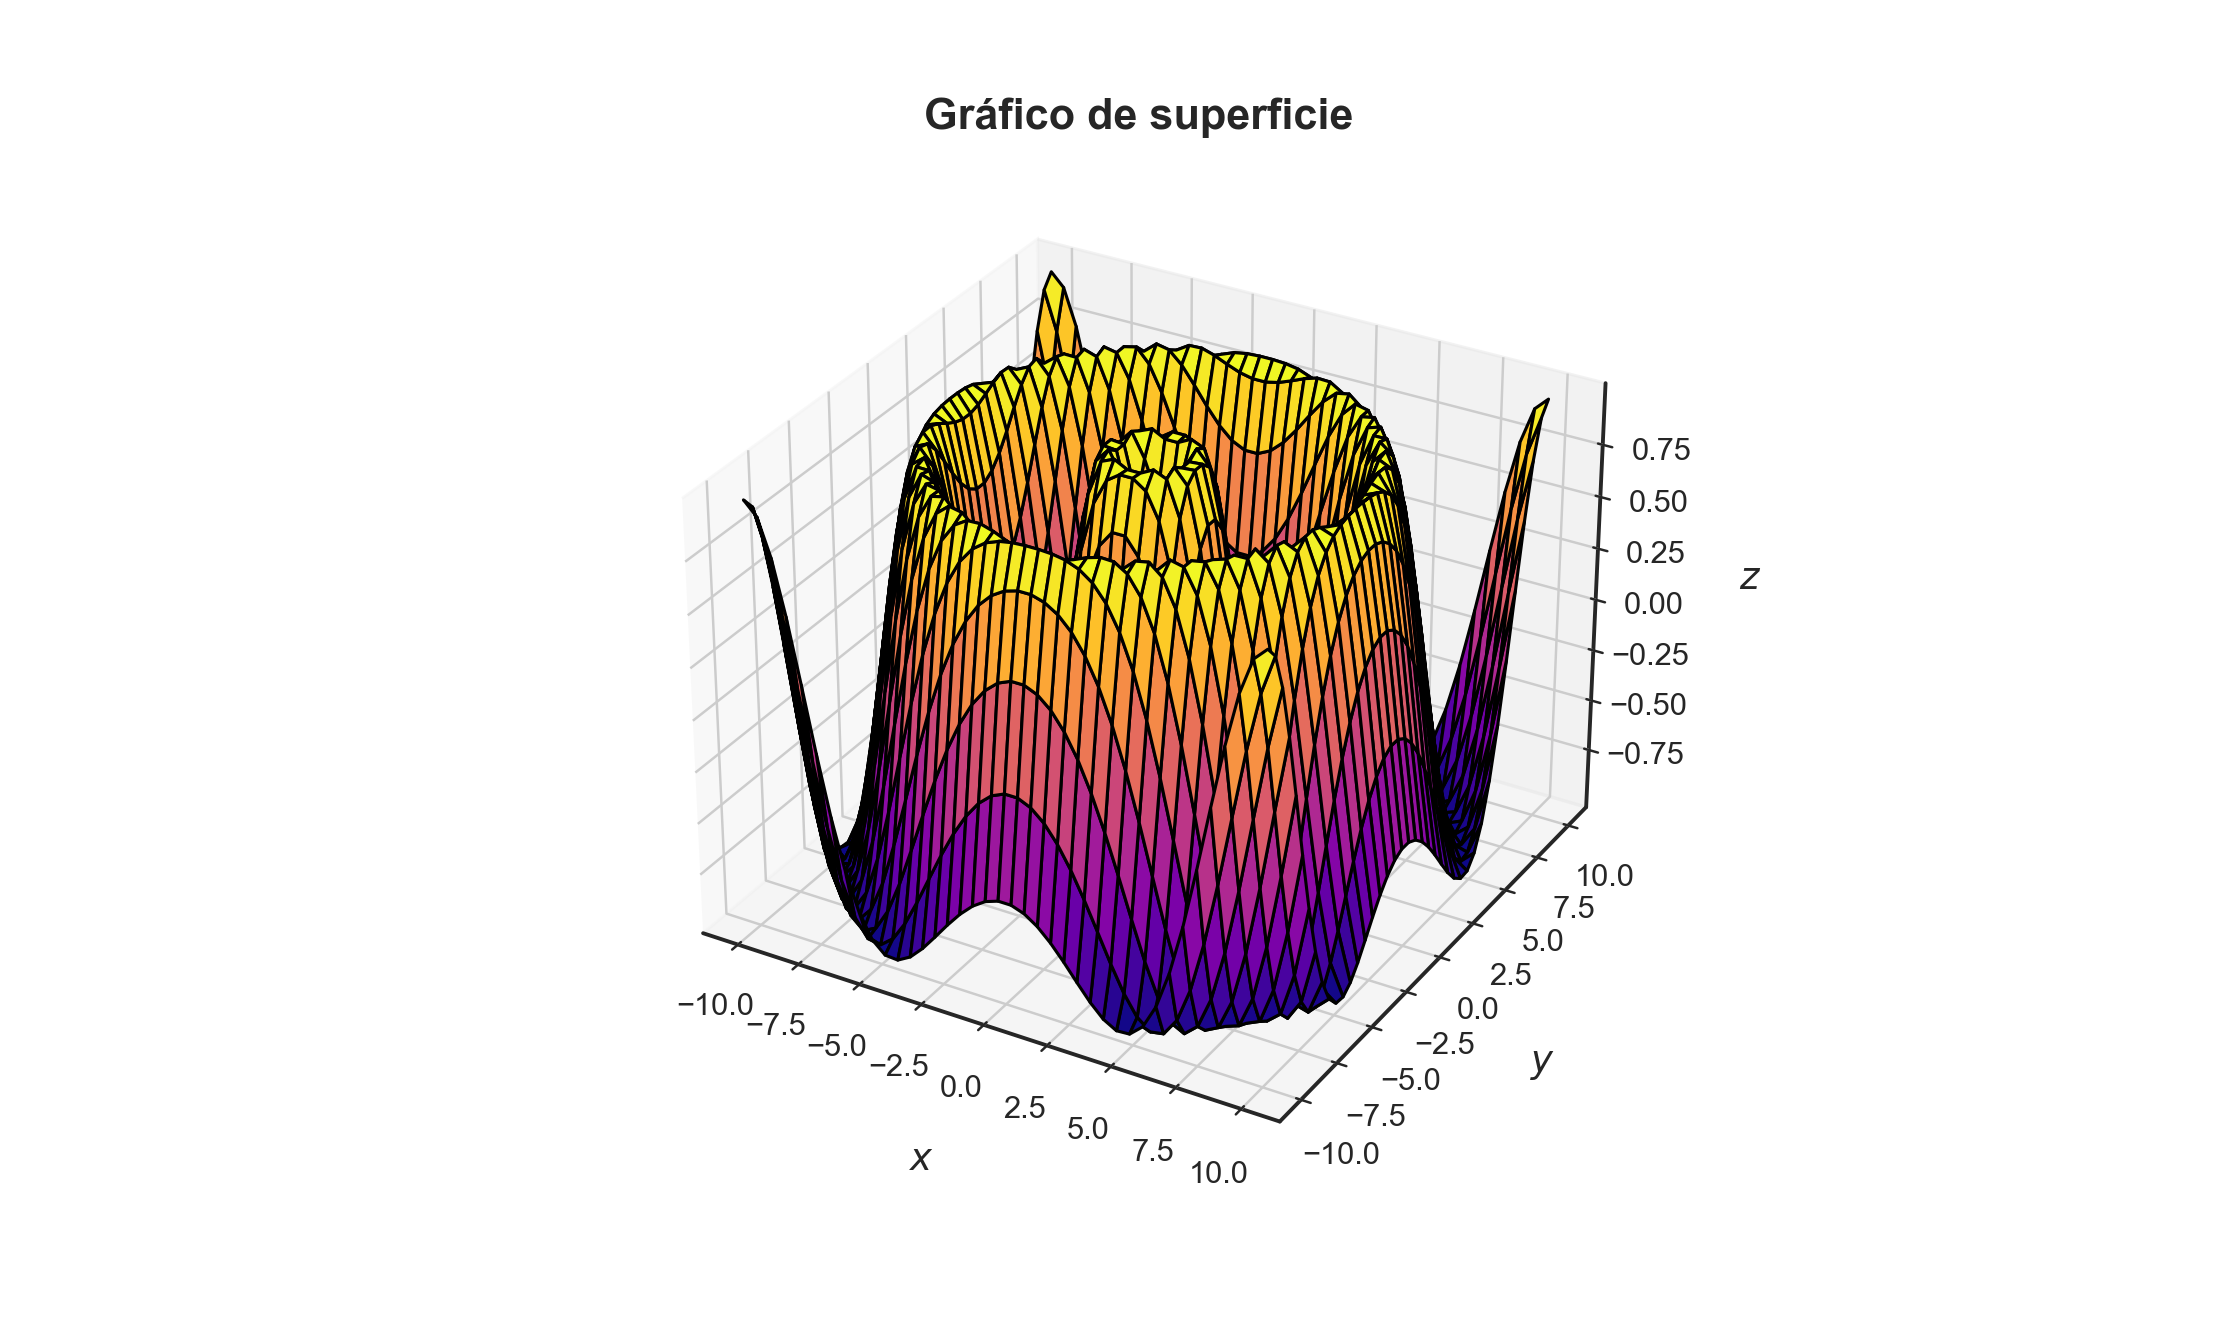

In [16]:
# Un ejemplo de superficie.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='plasma', edgecolor='k')
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.set_title('Gráfico de superficie', fontsize=14, fontweight="bold", pad=10);

En el gráfico anterior, los parámetros `rstride` y `cstride` nos permiten controlar la densidad de líneas de la malla completa y, por extensión, el número de polígonos a colorear en la superficie.

Notemos que, aunque la grilla requerida para un gráfico de superficie necesita ser bidimensional, no tiene por qué ser rectilínea. El siguiente es un ejemplo de una superficie creada a partir de una grilla polar parcial, la cual, cuando es usada junto con el método `ax.plot_surface()`, nos da un corte de la función que queremos visualizar:

In [17]:
# Construimos una parametrización en coordenadas polares del plano XY.
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

In [18]:
# Generamos la data.
X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

<IPython.core.display.Javascript object>


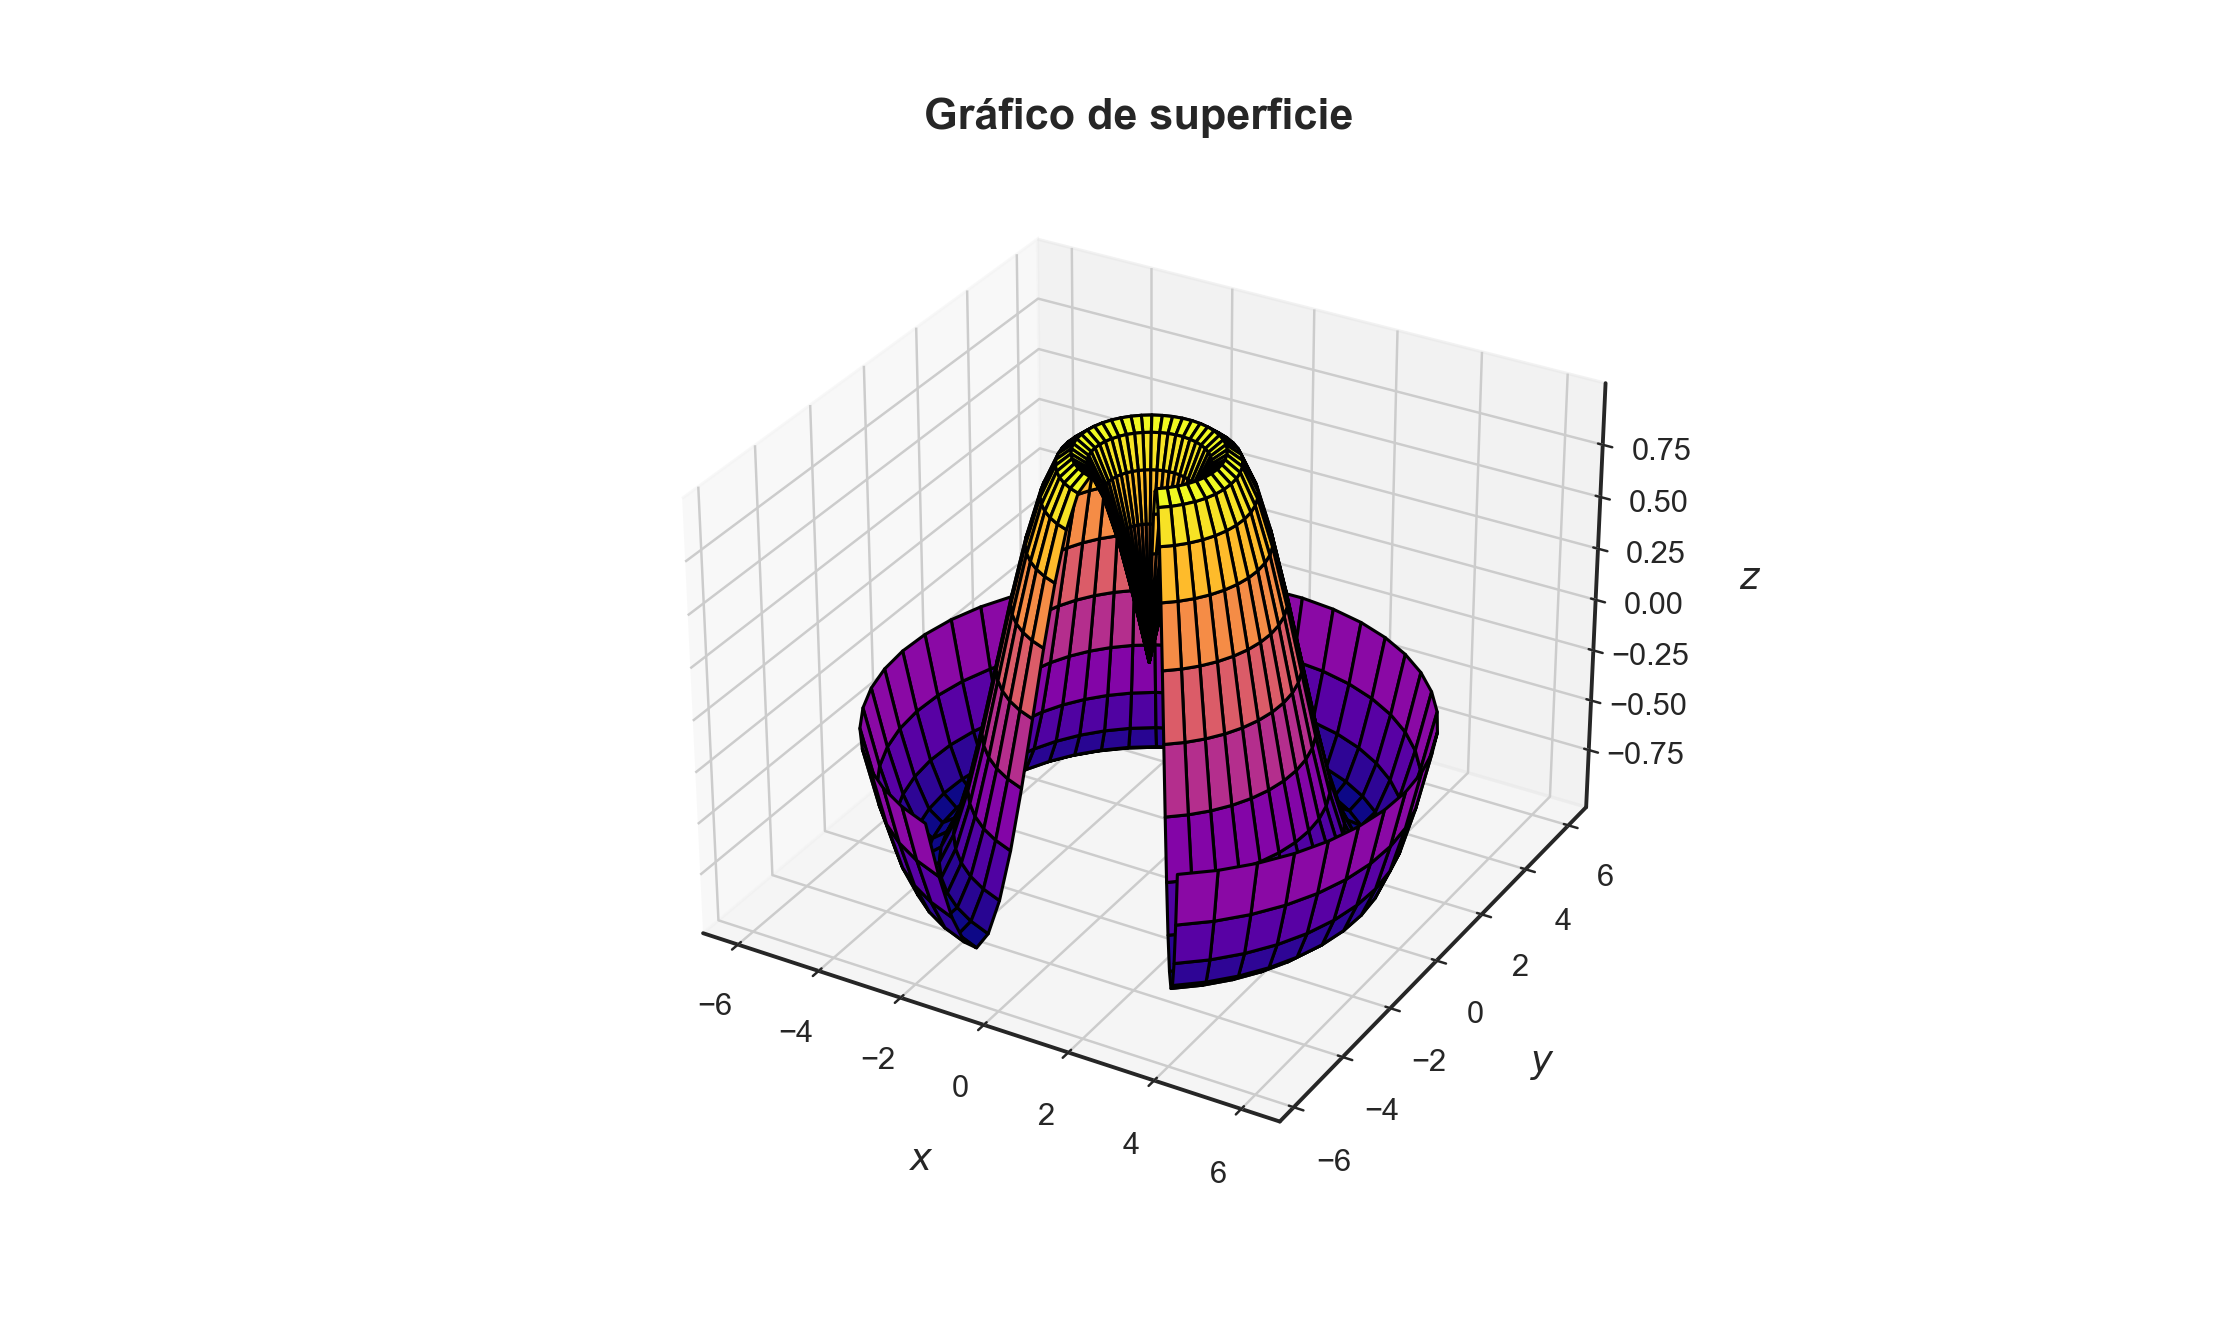

In [19]:
# Construimos el gráfico con el corte previo.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='plasma', edgecolor="k")
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.set_title('Gráfico de superficie', fontsize=14, fontweight="bold", pad=10);

## Triangulaciones.
Para algunas aplicaciones, las grillas bidimensionales requeridas por las funciones vistas previamente pueden llegar a ser inconvenientes o demasiado restrictivas, debido a que el mundo real no siempre nos ofrecerá data así de bien comportada. En estas situaciones, los gráficos basados en triangulaciones pueden ser muy útiles. En este contexto ¿Qué pasaría si, en vez de disponer de una malla regular de puntos en coordenadas polares o rectangulares, sólo disponemos de una muestra de estos puntos al azar?

Construyamos algo de data aleatoria que cumpla con este cometido:

In [20]:
# Data aleatoria que usaremos de ejemplo.
theta = 2 * np.pi * rng.random(size=1000)
r = 6 * rng.random(size=1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

Visualicemos estos puntos mediante un gráfico de dispersión:

<IPython.core.display.Javascript object>


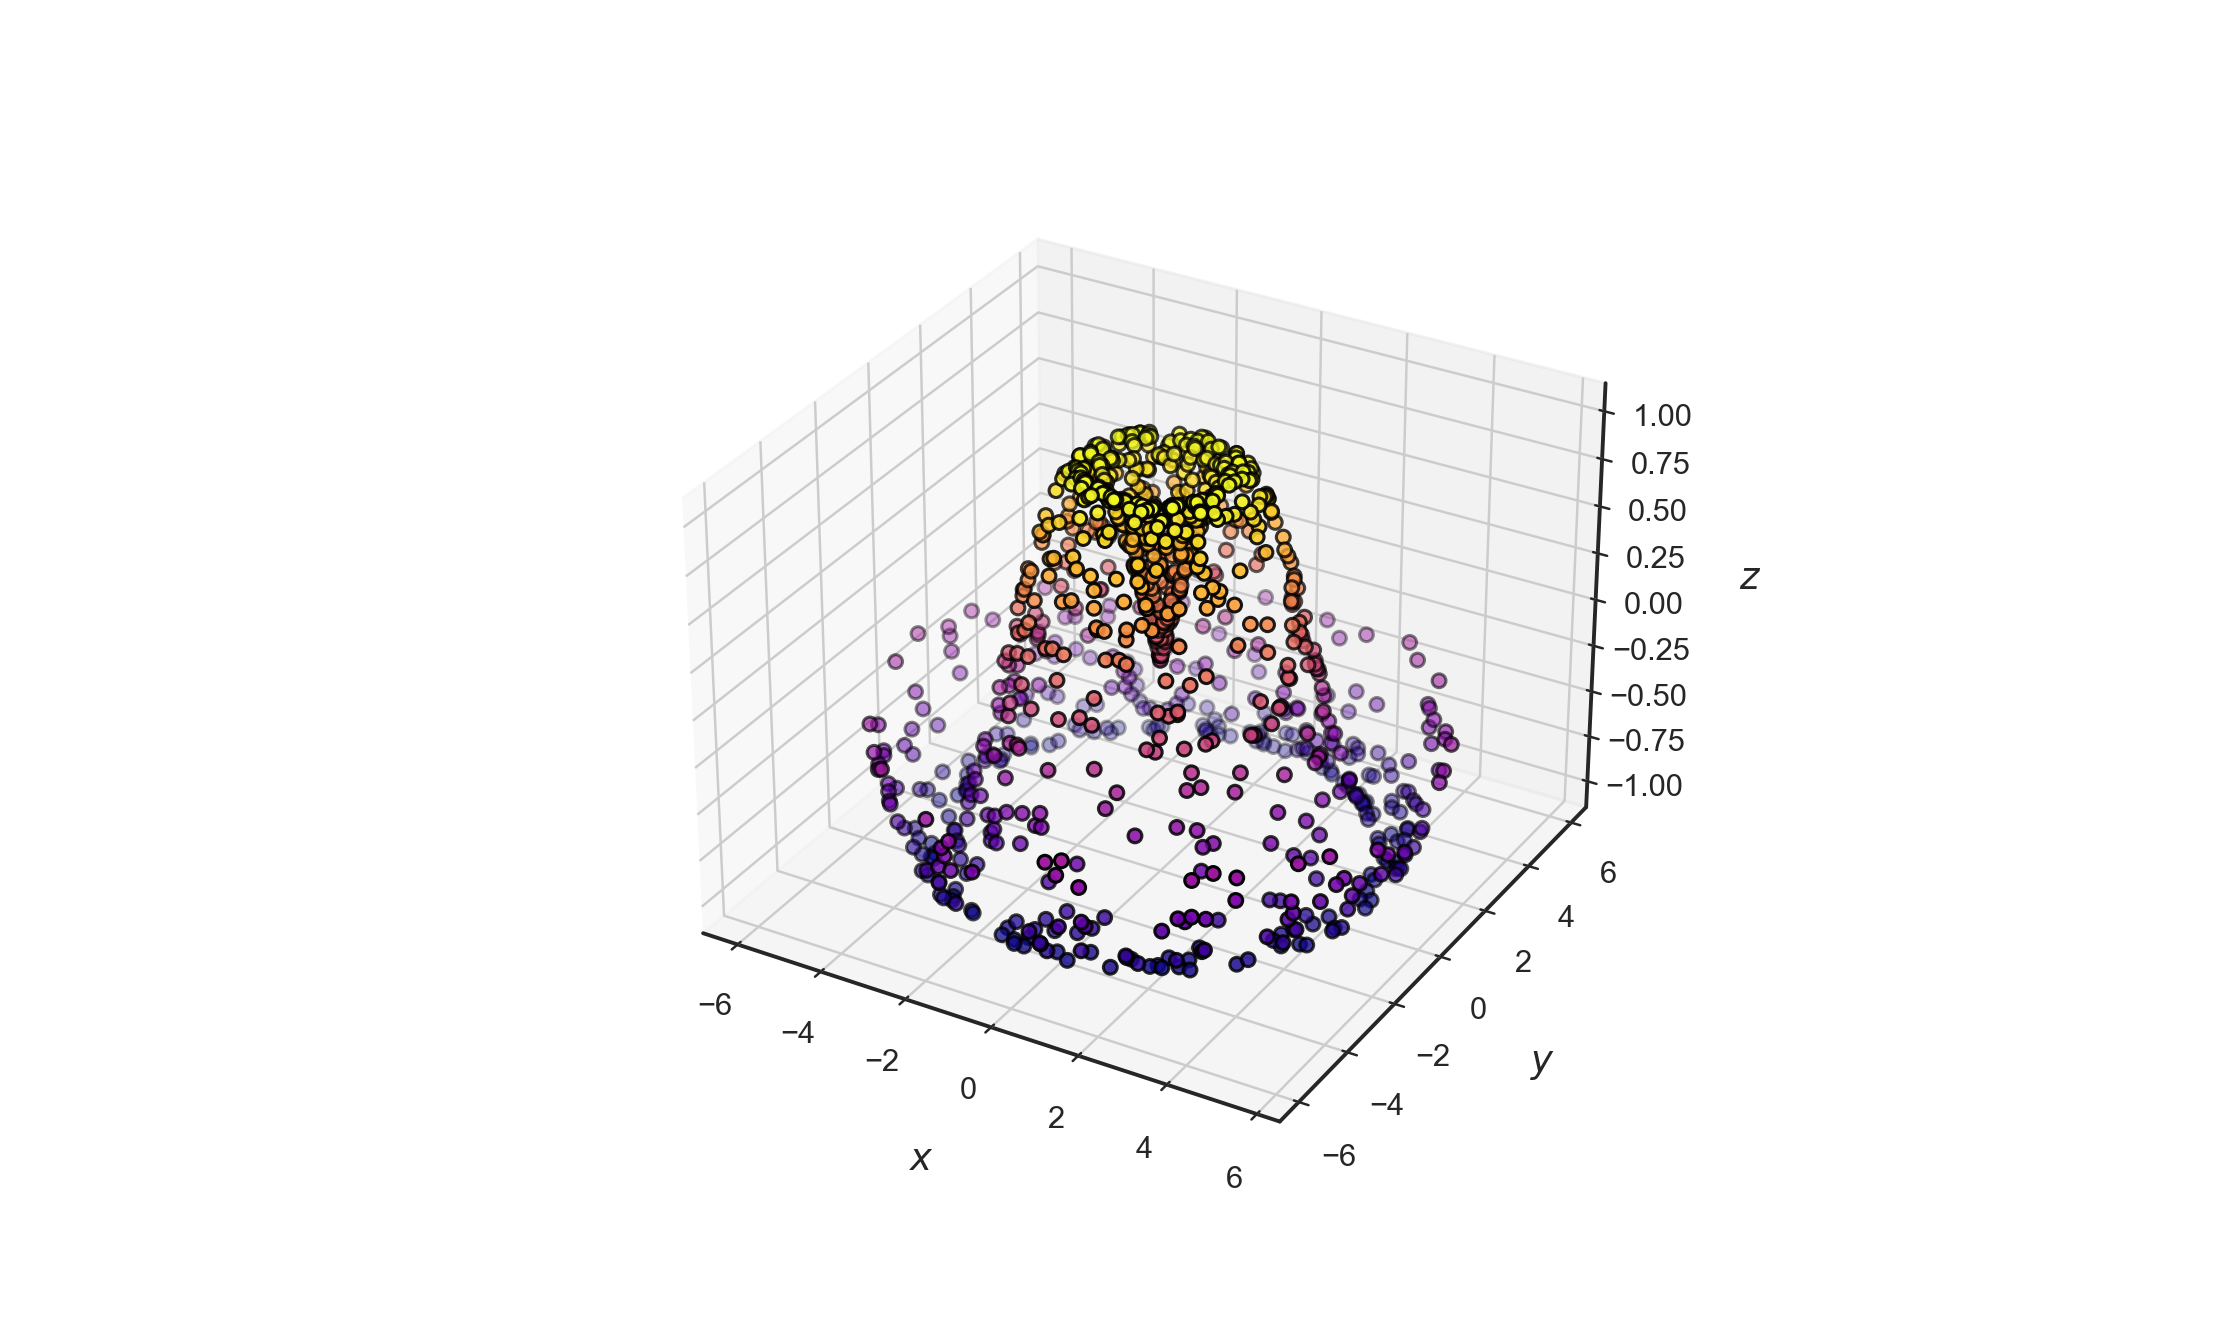

In [21]:
# Gráfico de dispersión de esta data.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='plasma', edgecolor="k")
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10);

Este gráfico deja bastante que desear. En estos casos, el método `ax.plot_trisurf()` nos permitirá construir la superficie más representativa de este conjunto de puntos mediante un procedimiento de triangulación:

<IPython.core.display.Javascript object>


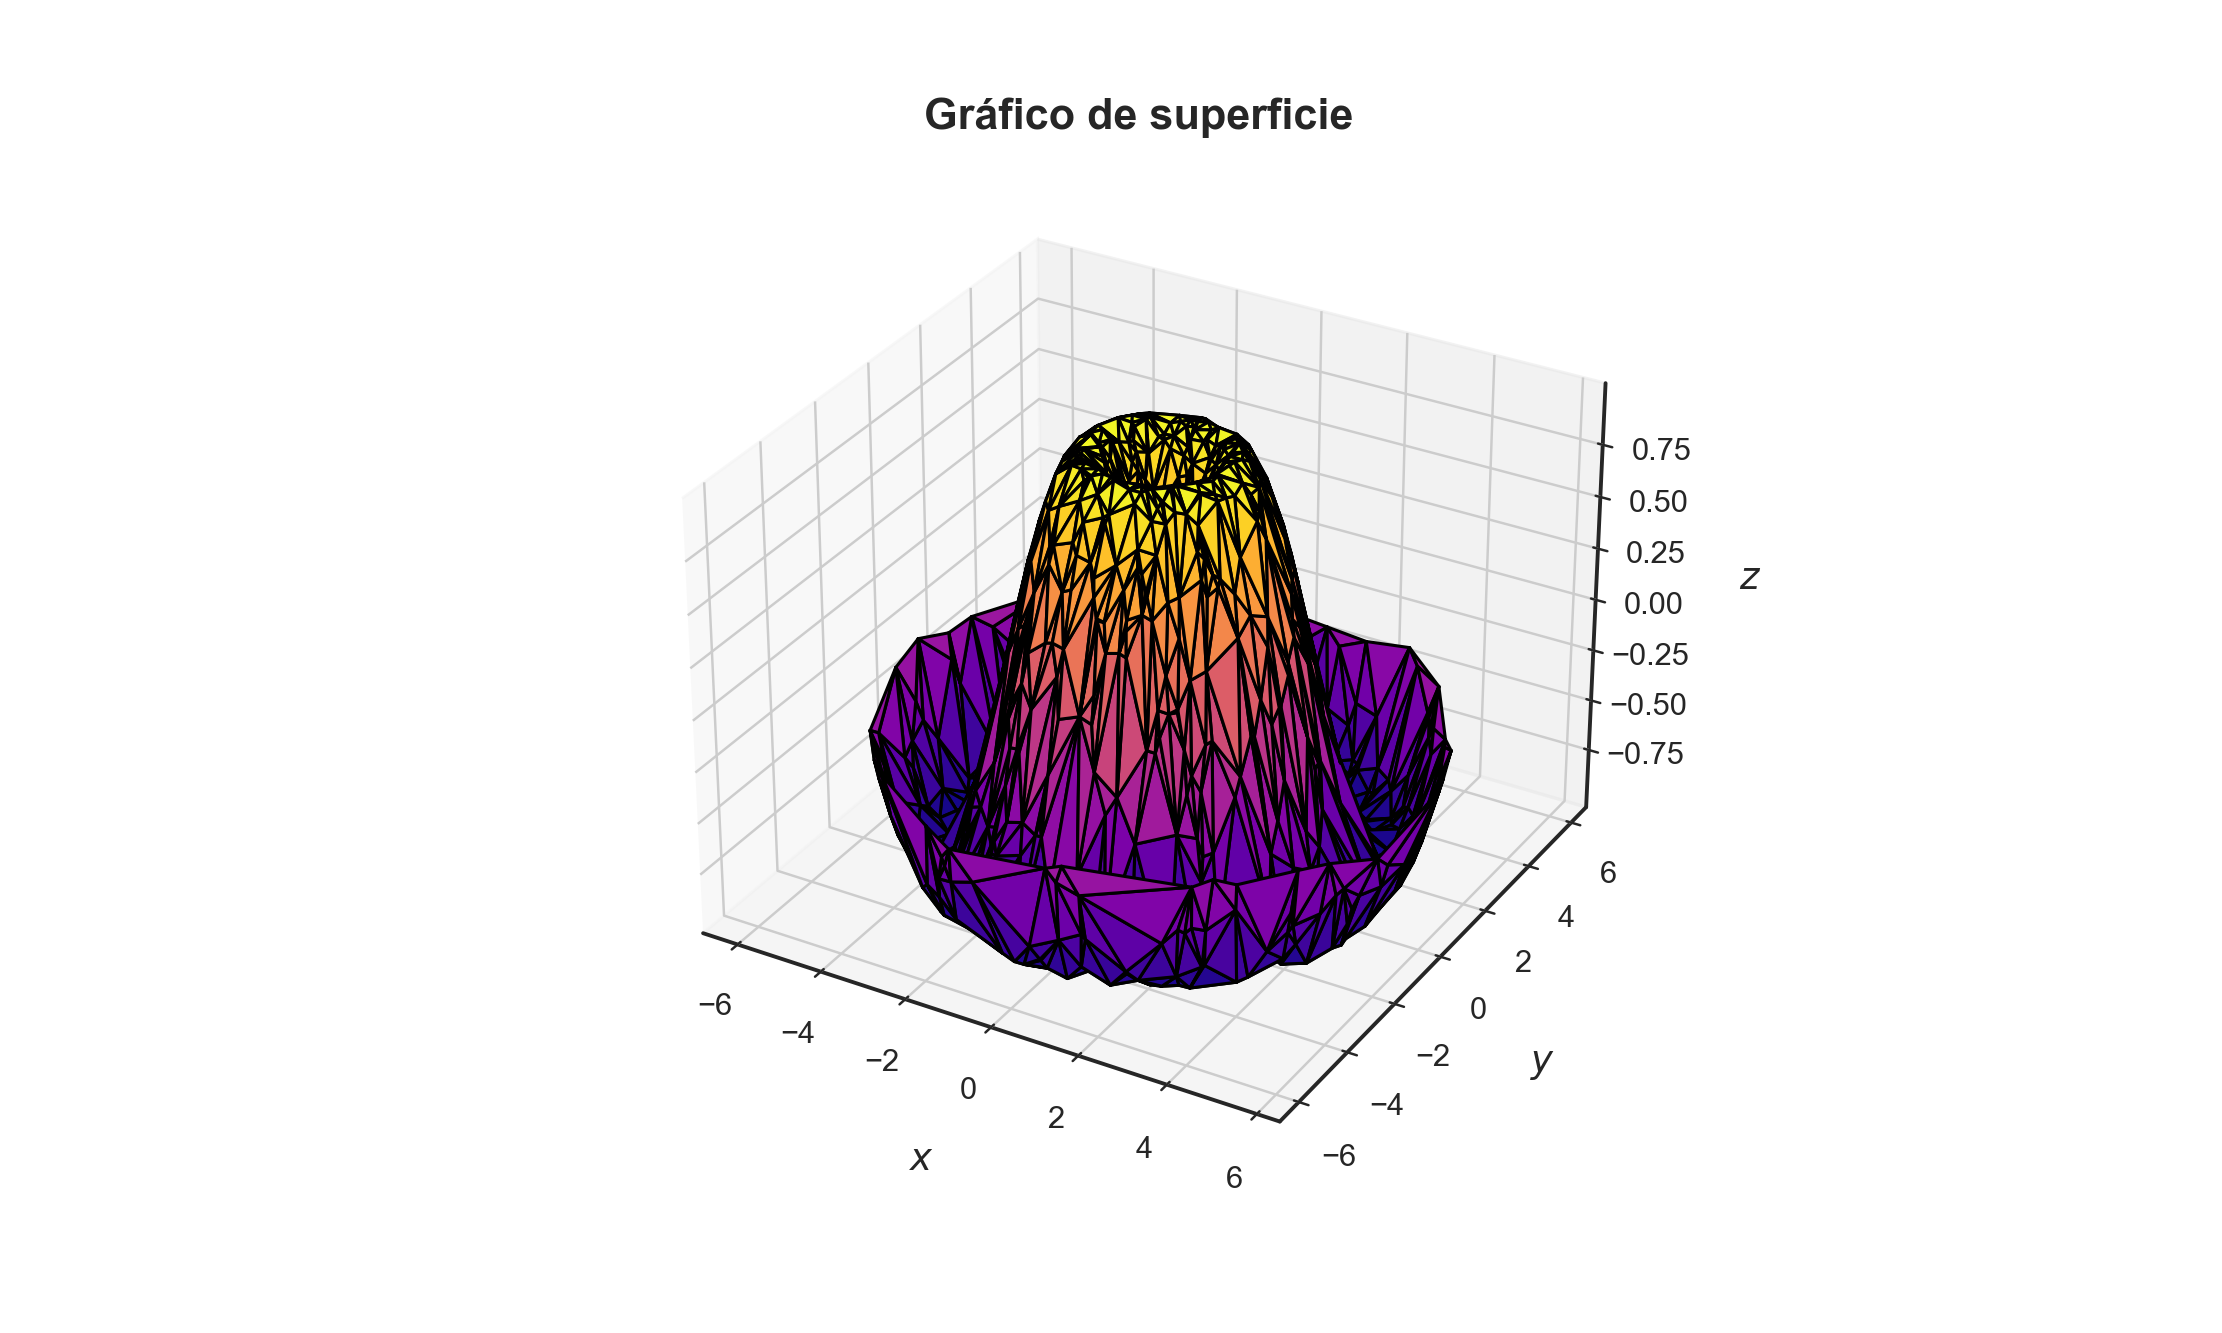

In [22]:
# Construimos el gráfico de superficie por medio de una triangulación.
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='plasma', edgecolor="k")
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.set_title('Gráfico de superficie', fontsize=14, fontweight="bold", pad=10);

La superficie resultante, por supuesto, no se verá tan limpia como cuando la graficamos a partir de una grilla regular. Pero la flexibilidad ofrecida por las triangulaciones puede dar lugar a visualizaciones de información bastante interesantes en la práctica.

**Ejemplo 4.1 - La banda de Möbius:** Una banda de Möbius es similar a un pedazo de papel en forma de cinta, donde cada extremo se pega y se tuerce a fin de que la superficie resultante tenga una sola cara y no tenga bordes. Es el típico ejemplo de superficie no orientable.

La idea clave para crear una banda de Möbius es pensar en su parametrización: Es una banda bidimensional, lo que implica dos variables en el dominio paramétrico. Llamemos $\pi$ a la componente transversal de la banda, que va de $0$ a $2\theta$, y $\omega$ a la componente radial, que va de $−1$ a $1$ (el ancho de la banda):

In [23]:
# Carta de ángulos que definen la banda de Möbius.
theta = np.linspace(start=0, stop=2*np.pi, num=50)
w = np.linspace(start=-0.5, stop=0.5, num=10)
w, theta = np.meshgrid(w, theta)

Ahora, a partir de esta parametrización, debemos determinar los puntos $(x, y, z)$ de la banda embebida en ella.

Al respecto, podemos observar que ocurren dos rotaciones. Una es la posición de los puntos que caracterizan a la superficie con respecto al centro (lo que llamamos $\theta$), mientras que la otra es el doblez de la banda con respecto a su eje longitudinal (llamaremos a este ángulo $\phi$). Para una banda de Möbius, debemos hacer que la banda se gire medio eje durante una vuelta completa, lo que implica que $\triangle \phi =\triangle \theta /2$:

In [24]:
# Doblez de la banda.
phi = 0.5 * theta

Definimos ahora la distancia radial $r$ al origen de cada punto de la banda a fin de calcular las ecuaciones paramétricas de cada punto $(x, y, z)$ de la misma:

$$\begin{array}{lll}r&=&1+\omega \cos \left( \phi \right)  \\ x&=&r\cos \left( \theta \right)  \\ y&=&r\  \mathrm{s} \mathrm{e} \mathrm{n} \left( \theta \right)  \\ z&=&\omega \  \mathrm{s} \mathrm{e} \mathrm{n} \left( \phi \right)  \end{array}$$
</p> <p style="text-align: right;">$(4.2)$</p>

Finalmente, para graficar este objeto, debemos asegurar que la triangulación es correcta. La mejor forma de hacer esto es definir dicha triangulación dentro de la parametrización subyacente, y dejar que **Matplotlib** realice la triangulación dentro del dominio de la banda de Möbius:

In [25]:
# Parametrización de la banda de Möbius
r = 1 + w * np.cos(phi)
x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

In [26]:
# Importamos la clase Triangulation().
from matplotlib.tri import Triangulation

In [27]:
# Realizamos la triangulación.
tri = Triangulation(np.ravel(w), np.ravel(theta))

<IPython.core.display.Javascript object>


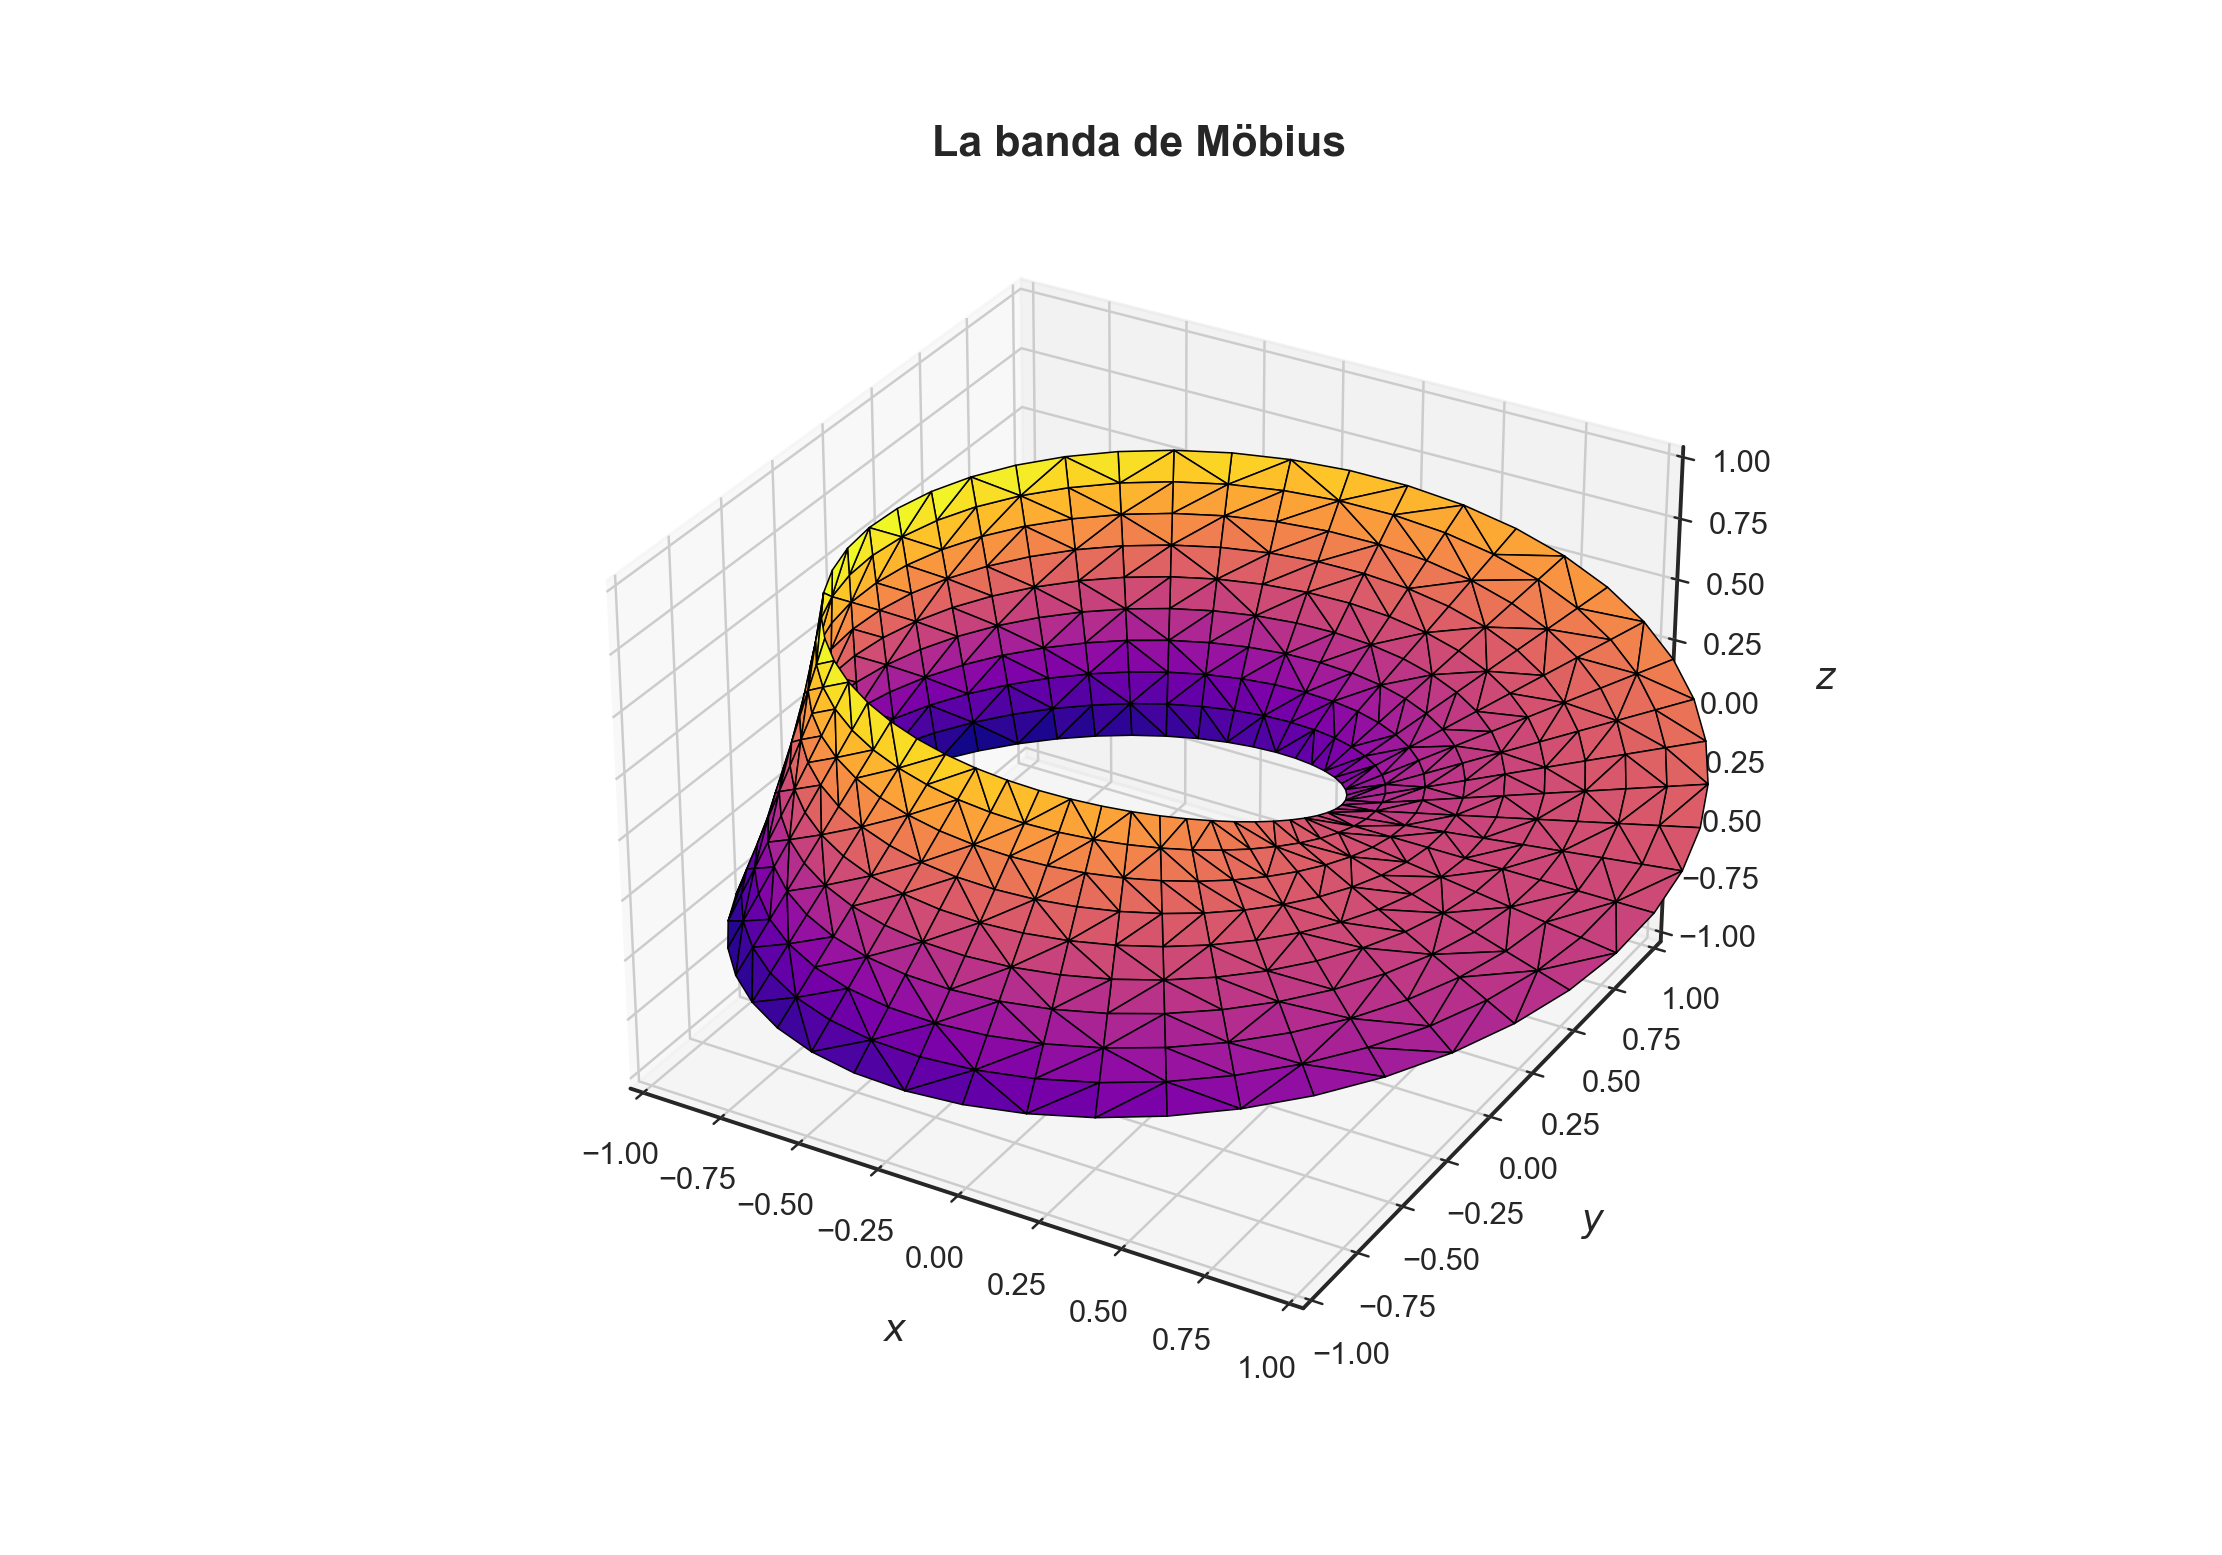

In [28]:
# Graficamos la banda de Möbius.
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap='plasma', edgecolor="k", lw=0.5);
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1)
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.set_title('La banda de Möbius', fontsize=14, fontweight="bold", pad=10);

◼

## Gráficos de barras tridimensionales.
Otro ejemplo típico de gráfico tridimensional (aunque quizás algo vencido por la obsolescencia) corresponde al de barras. Para ello, podemos hacer uso de la función `ax.bar3d()`.

La creación de este tipo de gráfico requiere, además de especificar las posiciones de cada barra en el plamo horizontal, definir sus alturas y sus parámetros geométricos (ancho y largo de cada una). Ejemplifiquemos un caso de uso sencillo:

In [29]:
# Creamos algo de data.
x = np.arange(start=1, stop=11, step=1)
y = rng.integers(low=1, high=10, size=x.shape[0])
z = np.zeros(x.shape[0]) # Las barras parten siempre parten desde Z = 0.

In [30]:
# Definimos la geometría de las barras.
dx = np.ones_like(x) # Dimensión en X igual a 1.
dy = np.ones_like(y) # Dimensión en Y igual a 1.
dz = rng.integers(low=0, high=200, size=z.shape[0]) # Altura de las barras.

<IPython.core.display.Javascript object>


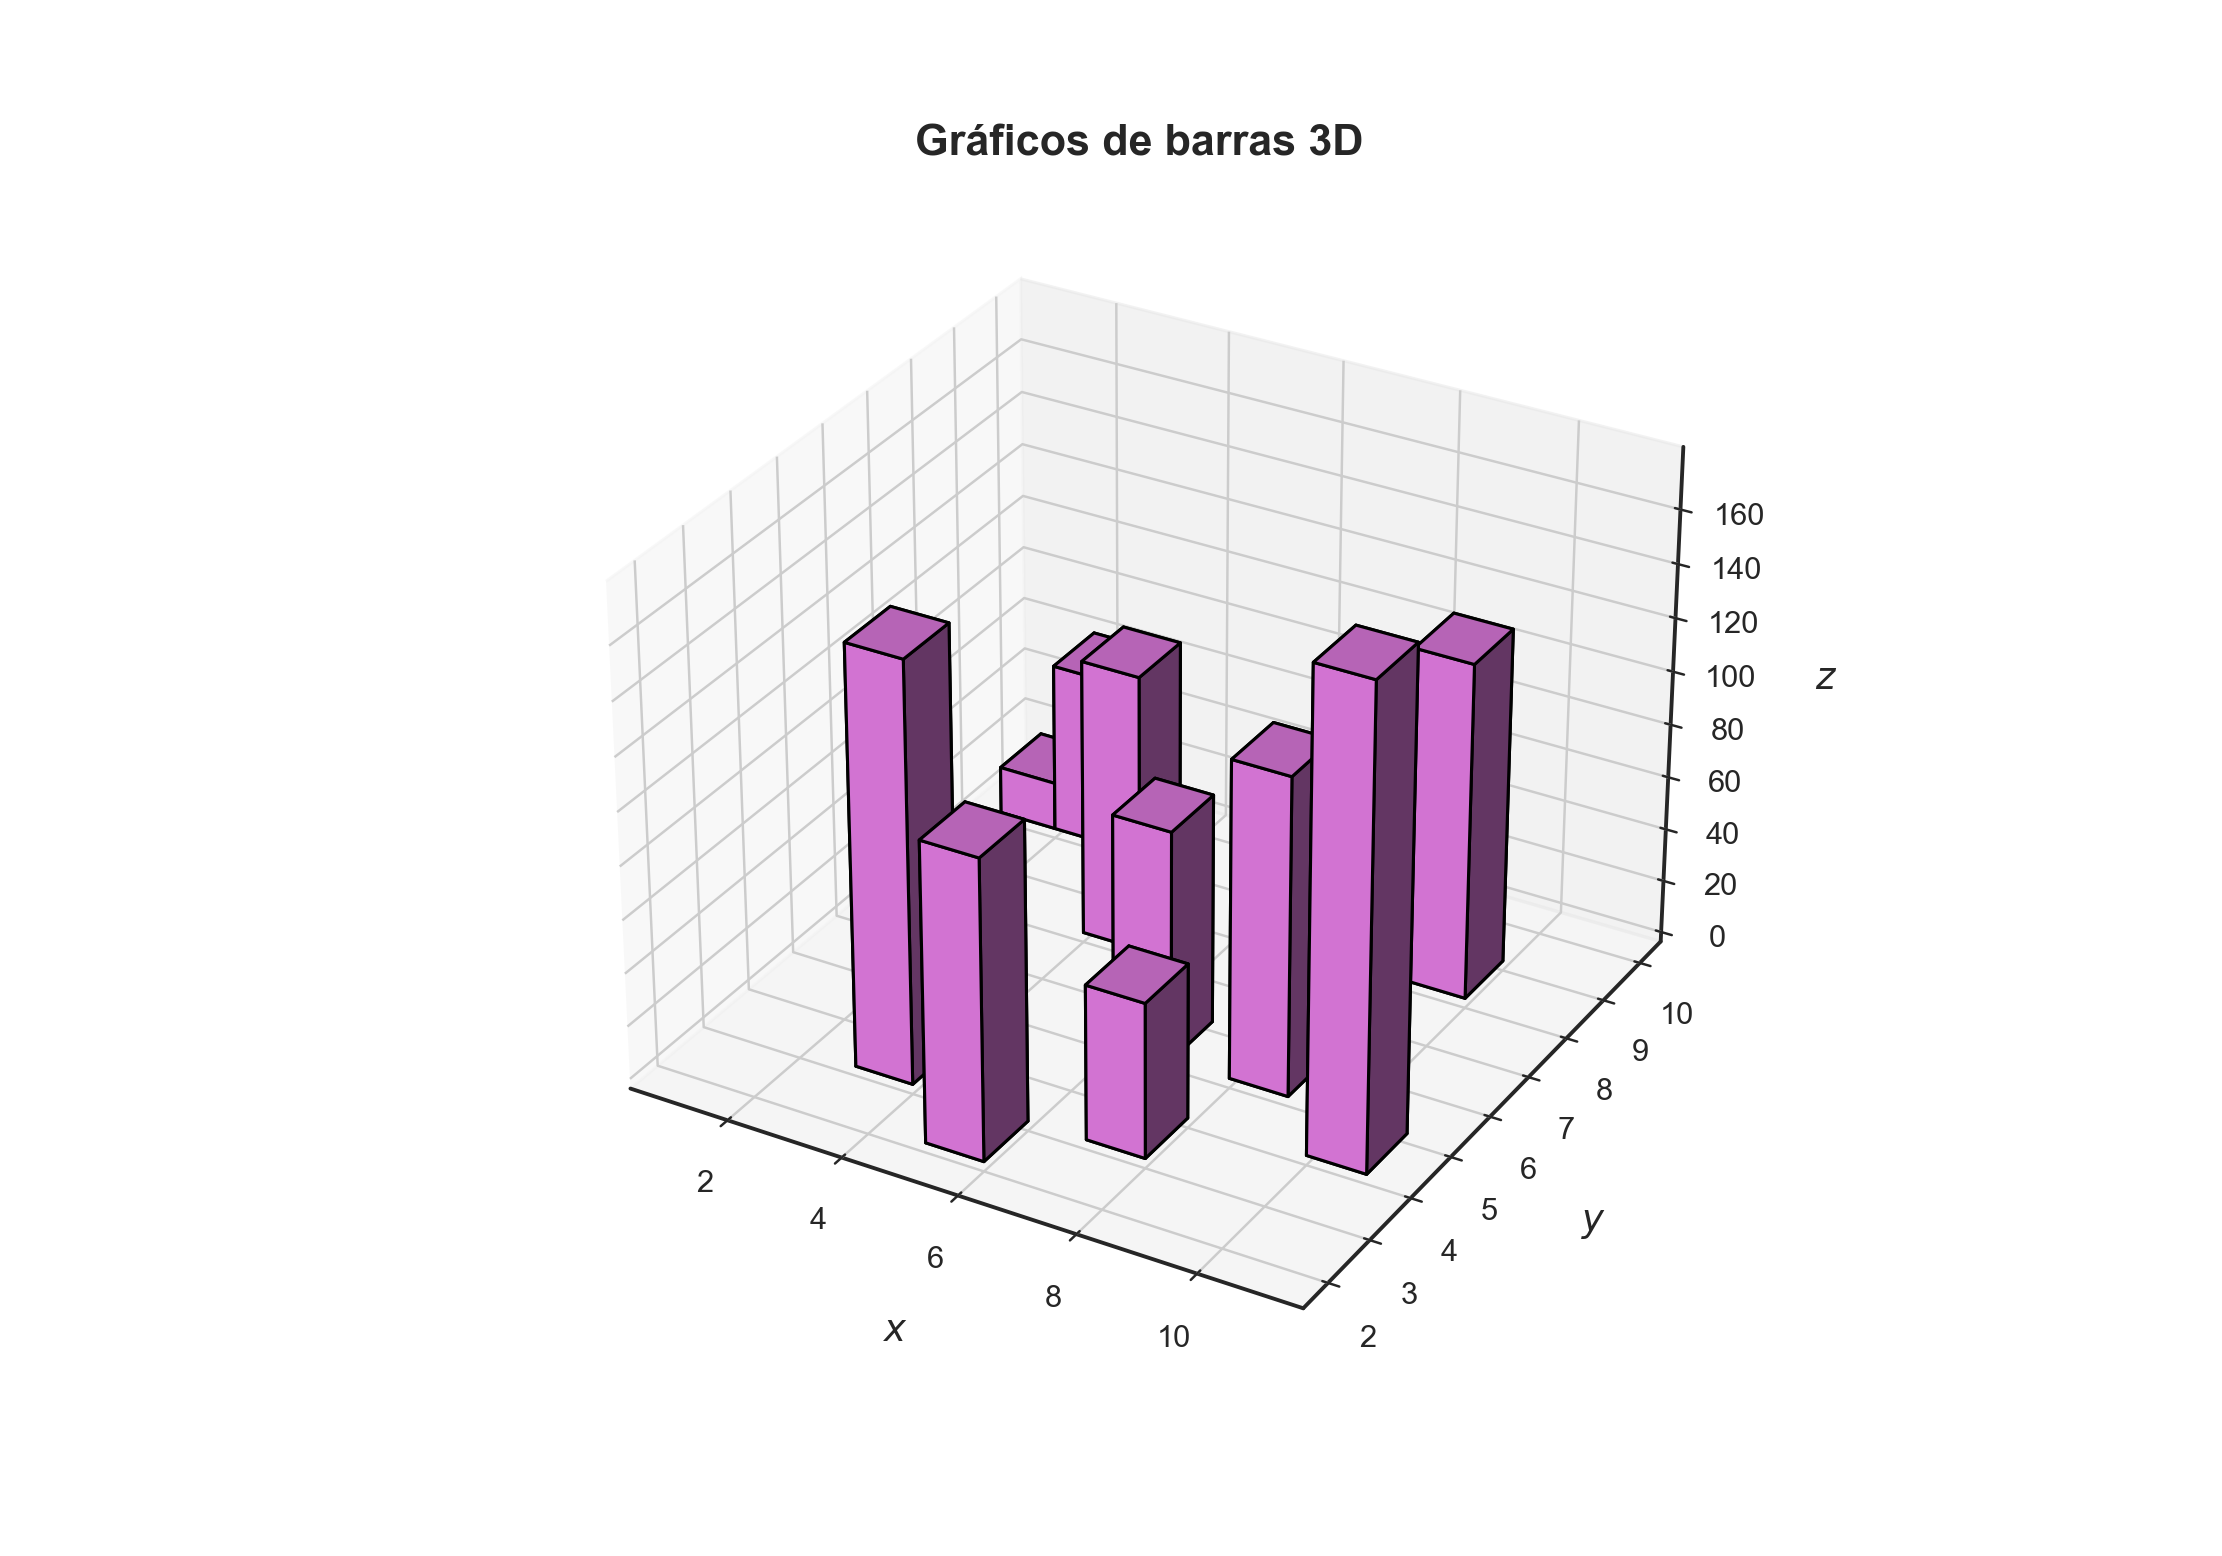

In [31]:
# Construimos nuestro gráfico.
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.bar3d(x, y, z, dx, dy, dz, color="violet", edgecolor="black", shade=True)
ax.set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax.set_title('Gráficos de barras 3D', fontsize=14, fontweight="bold", pad=10);

**Ejemplo 4.2 - Altura de columna extraída en una mina explotada por Panel Caving:** Un elemento importante de considerar en las minas subterráneas emplazadas a alta profundidad corresponde a la altura de columna extraída, donde la "columna" está referida al pilar de roca cuya base es un punto de extracción con una determinada área de influencia y que permiten teselar todo un nivel de producción (el diagrama resultante es, por extensión un diagrama de Voronoi). La sismicidad inducida en los niveles de hundimiento y extracción también es una resultante de la propia minería, y que suele ser de importancia cuando la energía irradiada por los eventos sísmicos supera un umbral crítico.

Los archivos `pex_cum_production.csv` y `seismic_data.csv` contienen información relativa a la producción acumulada (en toneladas) relativa a una serie de puntos de extracción en una mina subterránea explotada por Panel Caving hasta un cierto año en particular, y a la localización de los eventos sísmicos registrados en todo el yacimiento, respectivamente. Queremos construir un gráfico tridimensional consistente de barras en 3D que representen las alturas de columna ya extraídas por la operación, y un gráfico de dispersión que ilustre la ubicación espacial de los eventos sísmicos inducidos por la actividad minera. Tales eventos deben ubicarse a no más de 100 metros por encima del nivel de hundimiento respectivo, y a no más de 60 metros por debajo de él. Además, no deben extenderse más allá de 50 metros de la extensión del footprint completo. Además, para evitar mostrar demasiados eventos sísmicos, consideraremos únicamente aquellos que tengan una energía irradiada mayor a 1000 J.

Procedemos, en primer lugar, a acceder a los archivos:

In [32]:
# Accedemos a los archivos.
data_prod = pd.read_csv("datasets/pex_cum_production.csv", sep=";")
data_seis = pd.read_csv("datasets/seismic_data.csv", sep=";")

In [33]:
# Inspeccionamos las primeras cinco filas de cada dataset.
data_prod.head()

PEX       X       Y  Area   Produccion
0  2004H  650.02  634.54   291  105549.6485
1  2005H  644.84  653.86   293   86220.1995
2  2006H  639.66  673.18   301  145891.7522
3  2007H  634.48  692.50   301  164021.9621
4  2008H  629.30  711.82   301  144861.3464

In [34]:
data_seis.head()

X       Y        Z       Momento    Energia
0   217.49 -245.45  2286.87  7.366668e+08   4.999371
1   307.48 -350.93  2262.98  8.039232e+08   4.484128
2  1951.13  370.38  2545.90  3.480327e+08   2.128782
3   390.85 -268.03  2225.06  1.402106e+08  30.152088
4  1178.29  695.32  2130.32  1.378475e+07   0.103935

Dada una columna de área basal $S_{b}$ y altura $h$, su volumen puede calcularse como $V=S_{b}h$. Considerando una densidad aproximadamente constante, que denotamos como $\rho$, podemos estimar su masa mediante el cálculo $m=\rho S_{b}h$. De esta manera, la altura extraida de columna con base igual al área de un correspondiente punto de extracción, dada una densidad constante, es igual a

$$h=\displaystyle \frac{m}{\rho S_{b}}$$
</p> <p style="text-align: right;">$(4.3)$</p>

Con esta información, calculamos las alturas extraídas de mineral:

In [35]:
# Definimos la densidad del mineral.
density = 2.8

In [36]:
# Calculamos la altura extraída por columna.
data_prod["Altura Extraida"] = data_prod["Produccion"] / (data_prod["Area"] * density)

Y ahora filtramos los eventos sísmicos conforme el requerimiento previamente establecido. Consideraremos, para este ejercicio, que el nivel de hundimiento de este sector está en la cota $Z=2120$:

In [37]:
# Filtramos la data sísmica, hasta 100 m sobre el nivel de hundimiento y 60 m debajo.
data_seis_filt = data_seis[(data_seis["Z"] <= 2220) & (data_seis["Z"] >= 2060)]

In [38]:
# Y hasta 50 metros más lejos de cada borde del footprint.
X_max, X_min = data_prod["X"].max(), data_prod["X"].min()
Y_max, Y_min = data_prod["Y"].max(), data_prod["Y"].min()

data_seis_filt = data_seis_filt[
    (data_seis_filt["X"] <= X_max + 50) & 
    (data_seis_filt["X"] >= X_min - 50) &
    (data_seis_filt["Y"] <= Y_max + 50) & 
    (data_seis_filt["Y"] >= Y_min - 50)
]

In [39]:
# Y más de 10000 J de energía irradiada.
data_seis_filt = data_seis_filt[data_seis_filt["Energia"] >= 100]

Y ahora ya estamos en condiciones de construir nuestro gráfico:

In [40]:
x = data_prod["X"].values
y = data_prod["Y"].values
z = np.ones_like(x) * 2120

In [41]:
# Definimos la geometría de las barras.
dx = np.ones_like(x) * 15 # Dimensión en X igual a 20.
dy = np.ones_like(y) * 15 # Dimensión en Y igual a 20.
dz = data_prod["Altura Extraida"].values # Altura de las barras.

<IPython.core.display.Javascript object>


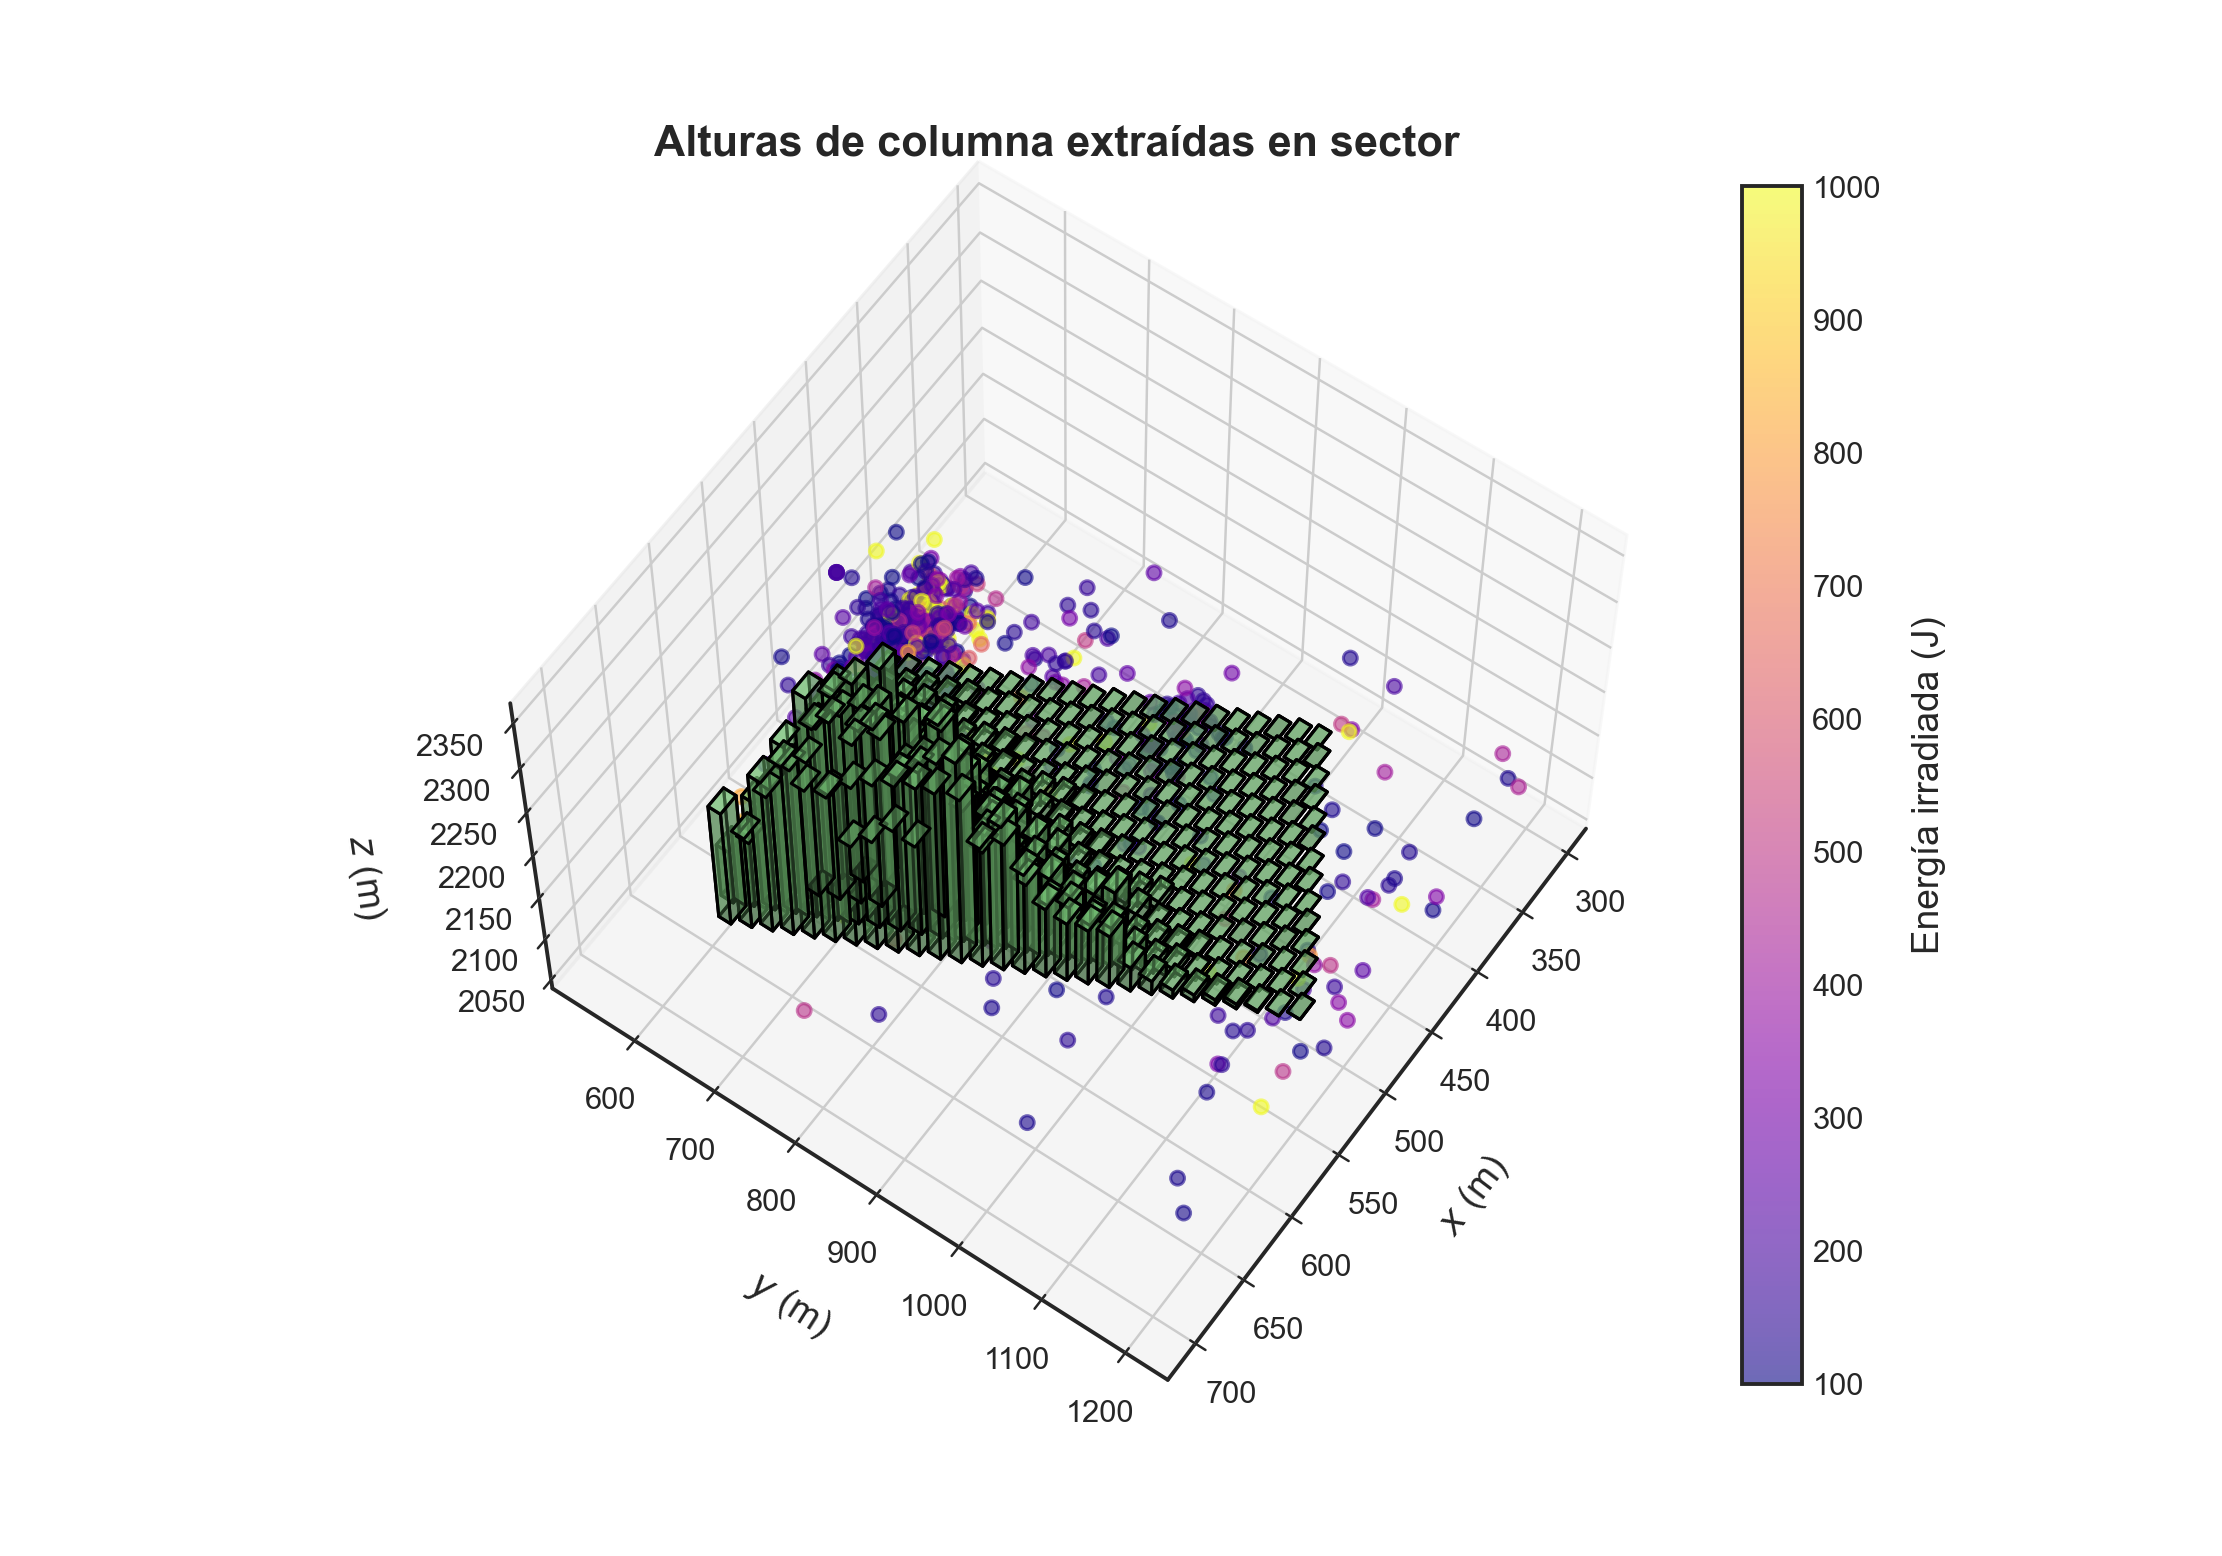

In [42]:
# Construimos nuestro gráfico.
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
p1 = ax.bar3d(
    x, y, z, dx, dy, dz, color="lightgreen", 
    edgecolor="black", shade=True, label="Columnas",
    alpha=0.5
)
p2 = ax.scatter3D(
    data_seis_filt["X"], data_seis_filt["Y"], data_seis_filt["Z"],
    c=data_seis_filt["Energia"], s=20, label="Eventos sísmicos", cmap="plasma",
    vmin=100, vmax=1000, alpha=0.6
)
cb = plt.colorbar(p2)
cb.set_label("Energía irradiada (J)", fontsize=12, labelpad=10)
ax.set_xlabel(r"$x$ (m)", fontsize=12, labelpad=10)
ax.set_ylabel(r"$y$ (m)", fontsize=12, labelpad=10)
ax.set_zlabel(r"$z$ (m)", fontsize=12, labelpad=10)
ax.set_title('Alturas de columna extraídas en sector', fontsize=14, fontweight="bold", pad=10)
ax.view_init(60, 35);

Podemos observar que la mayoría de los eventos sísmicos de mayor energía se generan en el sector suroeste de este sector productivo, en una zona donde la mayoría de las columnas ya han sido extraídas. ◼

## Comentarios finales.
Los conocimientos que hemos adquirido en esta sección son especialmente útiles para la creación de visualizaciones en 3D incluso de alta complejidad, yq ue pueden ser importantes en variados contextos, como el caso de la visualización tridimensional de la extracción versus la sismicidad inducida en un sector productivo explotado mediante Panel Caving, visualización de actividad sísmica en altura, fracturamiento hidráulico, entre otros posible usos de estas herramientas.

Ya estamos casi con todo lo relativo a **Matplotlib**. En la siguiente sección, revisaremos en detalle el uso de la librería **Seaborn**, que está basada en **Matplotlib**, y que permite crear visualizaciones de mayor complejidad con sólo unas pocas líneas de código.